In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyeem

In [2]:
pyeem.instruments.supported

name
manufacturer supported_models              
Agilent      Cary 4E                cary_4e
             Cary Eclipse      cary_eclipse
Horiba       Aqualog-880-C          aqualog
             SPEX Fluorolog-3     fluorolog
Tecan        Spark                    spark

In [3]:
data_dir = "../../../../local_test_data/pigment_calibration_IV"
calibration_sources = {
    "chloropyhll": "ug/L",
    "phycocyanin": "ug/L",
}
# "fucoxanthin": "ug/L"

dataset = pyeem.datasets.Dataset(
    data_dir=data_dir,
    calibration_sources=calibration_sources,
    raman_instrument="cary_eclipse",
    absorbance_instrument=None,
    eem_instrument="cary_eclipse",
    mode="w"
)

In [4]:
display(dataset.meta_df)

datetime_utc          filename  \
sample_set scan_type                                           
1          sample_eem  2020-07-29 10:30:00   sample_eem1.csv   
           sample_eem  2020-07-29 10:45:00   sample_eem2.csv   
           sample_eem  2020-08-04 11:00:00   sample_eem3.csv   
           sample_eem  2020-08-04 12:00:00   sample_eem4.csv   
           sample_eem  2020-08-04 13:00:00   sample_eem5.csv   
           blank_eem   2020-08-06 13:00:00    blank_eem1.csv   
           water_raman 2020-08-07 13:00:00  water_raman1.csv   
           water_raman 2020-08-08 13:00:00  water_raman2.csv   
2          sample_eem  2020-08-09 13:00:00   sample_eem1.csv   
           sample_eem  2020-08-10 13:00:00   sample_eem2.csv   
           sample_eem  2020-08-11 13:00:00   sample_eem3.csv   
           sample_eem  2020-08-12 13:00:00   sample_eem4.csv   
           sample_eem  2020-08-13 13:00:00   sample_eem5.csv   
           blank_eem   2020-08-14 13:00:00    blank_eem1.csv   
           water_raman 2020-08-15 13:00:00  water_raman1.csv   
           water_raman 2020-08-16 13:00:00  water_raman2.csv   
3          sample_eem  2020-08-17 13:00:00   sample_eem1.csv   
           sample_eem  2020-08-18 13:00:00   sample_eem2.csv   
           sample_eem  2020-08-19 13:00:00   sample_eem3.csv   
           sample_eem  2020-08-20 13:00:00   sample_eem4.csv   
           sample_eem  2020-08-21 13:00:00   sample_eem5.csv   
           blank_eem   2020-08-22 13:00:00    blank_eem1.csv   
           water_raman 2020-08-23 13:00:00  water_raman1.csv   
           water_raman 2020-08-24 13:00:00  water_raman2.csv   
4          sample_eem  2020-08-25 13:00:00   sample_eem1.csv   
           sample_eem  2020-08-26 13:00:00   sample_eem2.csv   
           sample_eem  2020-08-27 13:00:00   sample_eem3.csv   
           sample_eem  2020-08-28 13:00:00   sample_eem4.csv   
           blank_eem   2020-08-29 13:00:00    blank_eem1.csv   
           water_raman 2020-08-30 13:00:00  water_raman1.csv   
           water_raman 2020-08-31 13:00:00  water_raman2.csv   
5          sample_eem  2020-08-31 13:01:00   sample_eem1.csv   
           sample_eem  2020-08-31 13:02:00   sample_eem2.csv   
           sample_eem  2020-08-31 13:03:00   sample_eem3.csv   
           sample_eem  2020-08-31 13:04:00   sample_eem4.csv   
           sample_eem  2020-08-31 13:05:00   sample_eem5.csv   
           sample_eem  2020-08-31 13:06:00   sample_eem6.csv   
           blank_eem   2020-08-31 13:07:00    blank_eem1.csv   
           water_raman 2020-08-31 13:08:00  water_raman1.csv   
           water_raman 2020-08-31 13:09:00  water_raman2.csv   

                                  description comments collected_by  dilution  \
sample_set scan_type                                                            
1          sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           blank_eem    water with 1% acetone                             1.0   
           water_raman                    275                             1.0   
           water_raman                    350                             1.0   
2          sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           sample_eem                                                     1.0   
           blank_eem                    water                             1.0   
           water_raman                    275

In [5]:
routine_df = pyeem.preprocessing.create_routine(
    crop=True,
    blank_subtraction=True,
    scatter_removal=True,
)
display(routine_df)

step_name                                     hdf_path
step_order                                                                
0                         raw                             raw_sample_sets/
1                        crop                   preprocessing/filters/crop
2           blank_subtraction  preprocessing/corrections/blank_subtraction
3             scatter_removal    preprocessing/corrections/scatter_removal
4                    complete                      preprocessing/complete/

In [15]:
# Keep everything
#crop_dims = {"emission_bounds": (-np.inf, np.inf), "excitation_bounds": (-np.inf, np.inf)}

# microcystis peak
#crop_dims = {"emission_bounds": (640, 650),"excitation_bounds": (610, 630)}

# chlorella peak
crop_dims = {"emission_bounds": (600, 800),"excitation_bounds": (-np.inf, 720)}

# fuco. peak
#crop_dims = {"emission_bounds": (600, 800),"excitation_bounds": (-np.inf, 600)}


kwargs = {
    "crop_dims": crop_dims,
    "band": "rayleigh",
    "order": "both",
    "excision_width": 50,
    "fill": "interp"
}

routine_results_df = pyeem.preprocessing.perform_routine(
    dataset, routine_df, progress_bar=True, **kwargs
)
display(routine_results_df)

Preprocessing scan sets: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


step_completed  \
sample_set scan_type  name        step_name                          
1          blank_eem  blank_eem1  raw                         True   
                                  crop                        True   
           sample_eem sample_eem1 raw                         True   
                                  crop                        True   
                                  blank_subtraction           True   
...                                                            ...   
5          sample_eem sample_eem6 raw                         True   
                                  crop                        True   
                                  blank_subtraction           True   
                                  scatter_removal             True   
                                  complete                    True   

                                                    step_exception  \
sample_set scan_type  name        step_name                          
1          blank_eem  blank_eem1  raw                         None   
                                  crop                        None   
           sample_eem sample_eem1 raw                         None   
                                  crop                        None   
                                  blank_subtraction           None   
...                                                            ...   
5          sample_eem sample_eem6 raw                         None   
                                  crop                        None   
                                  blank_subtraction           None   
                                  scatter_removal             None   
                                  complete                    None   

                                                                                              hdf_path  \
sample_set scan_type  name        step_name                                                              
1          blank_eem  blank_eem1  raw                                     raw_sample_sets/1/blank_eem1   
                                  crop                         preprocessing/filters/crop/1/blank_eem1   
           sample_eem sample_eem1 raw                                    raw_sample_sets/1/sample_eem1   
                                  crop                        preprocessing/filters/crop/1/sample_eem1   
                                  blank_subtraction  preprocessing/corrections/blank_subtraction/1/...   
...                                                                                                ...   
5          sample_eem sample_eem6 raw                                    raw_sample_sets/5/sample_eem6   
                                  crop                        preprocessing/filters/crop/5/sample_eem6   
                                  blank_subtraction  preprocessing/corrections/blank_subtraction/5/...   
                                  scatter_removal    preprocessing/corrections/scatter_removal/5/sa...   
                                  complete                        preprocessing/complete/5/sample_eem6   

                                                             units  
sample_set scan_type  name        step_name                         
1          blank_eem  blank_eem1  raw                Intensity, AU  
                                  crop               Intensity, AU  
           sample_eem sample_eem1 raw                Intensity, AU  
                                  crop               Intensity, AU  
                                  blank_subtraction  Intensity, AU  
...                                                            ...  
5          sample_eem sample_eem6 raw                Intensity, AU  
                                  crop               Intensity, AU  
                                  blank_subtraction  Intensity, AU  
                                  scatter_removal    Intensity, AU  
                       

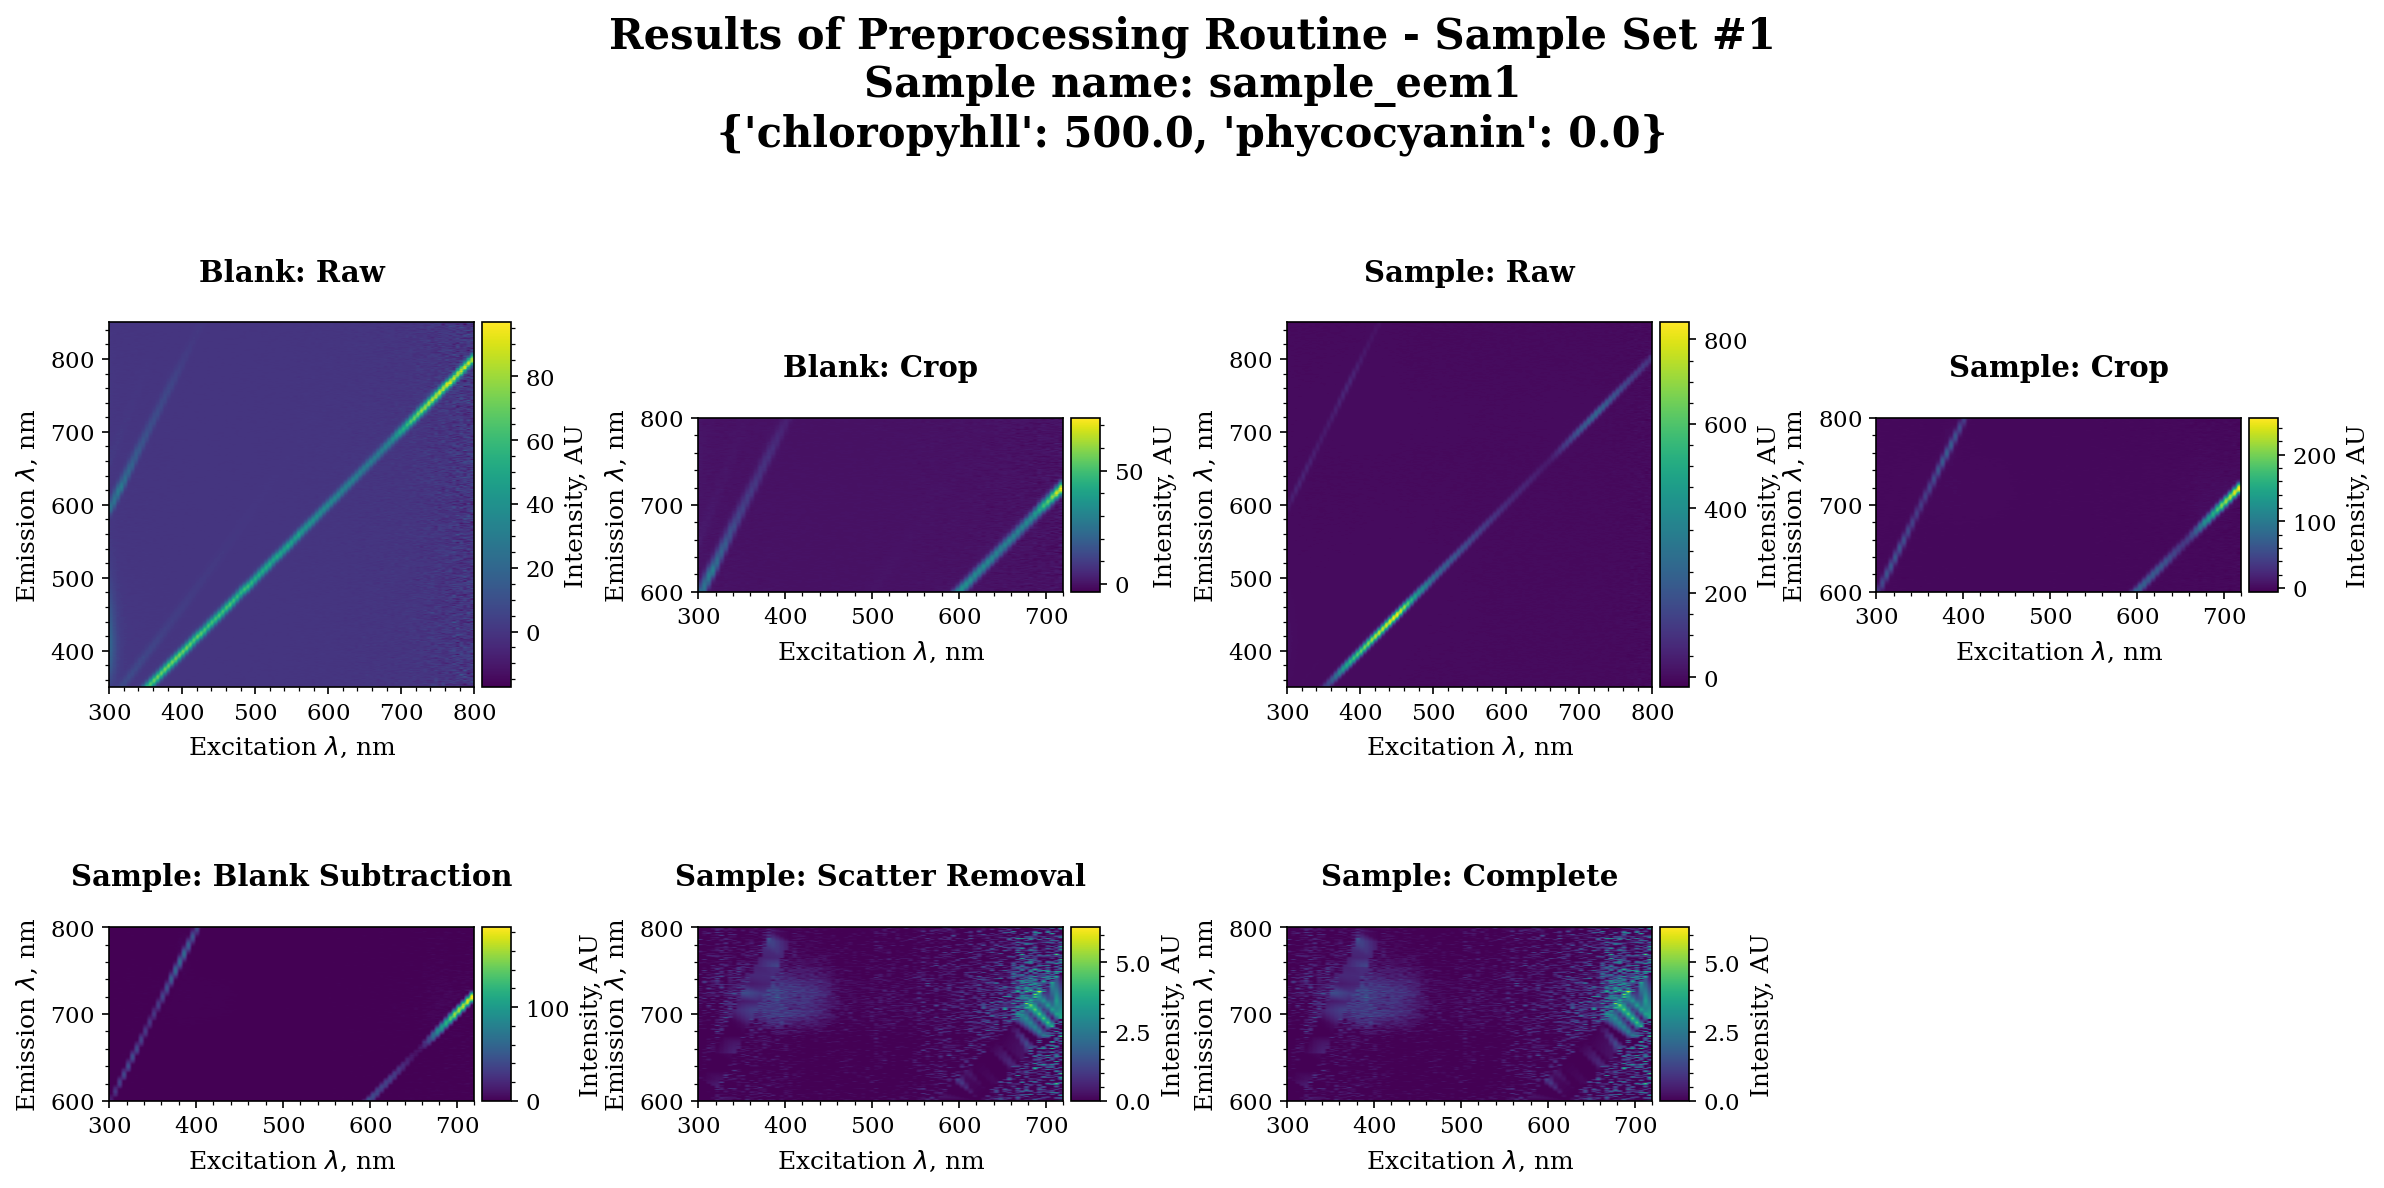

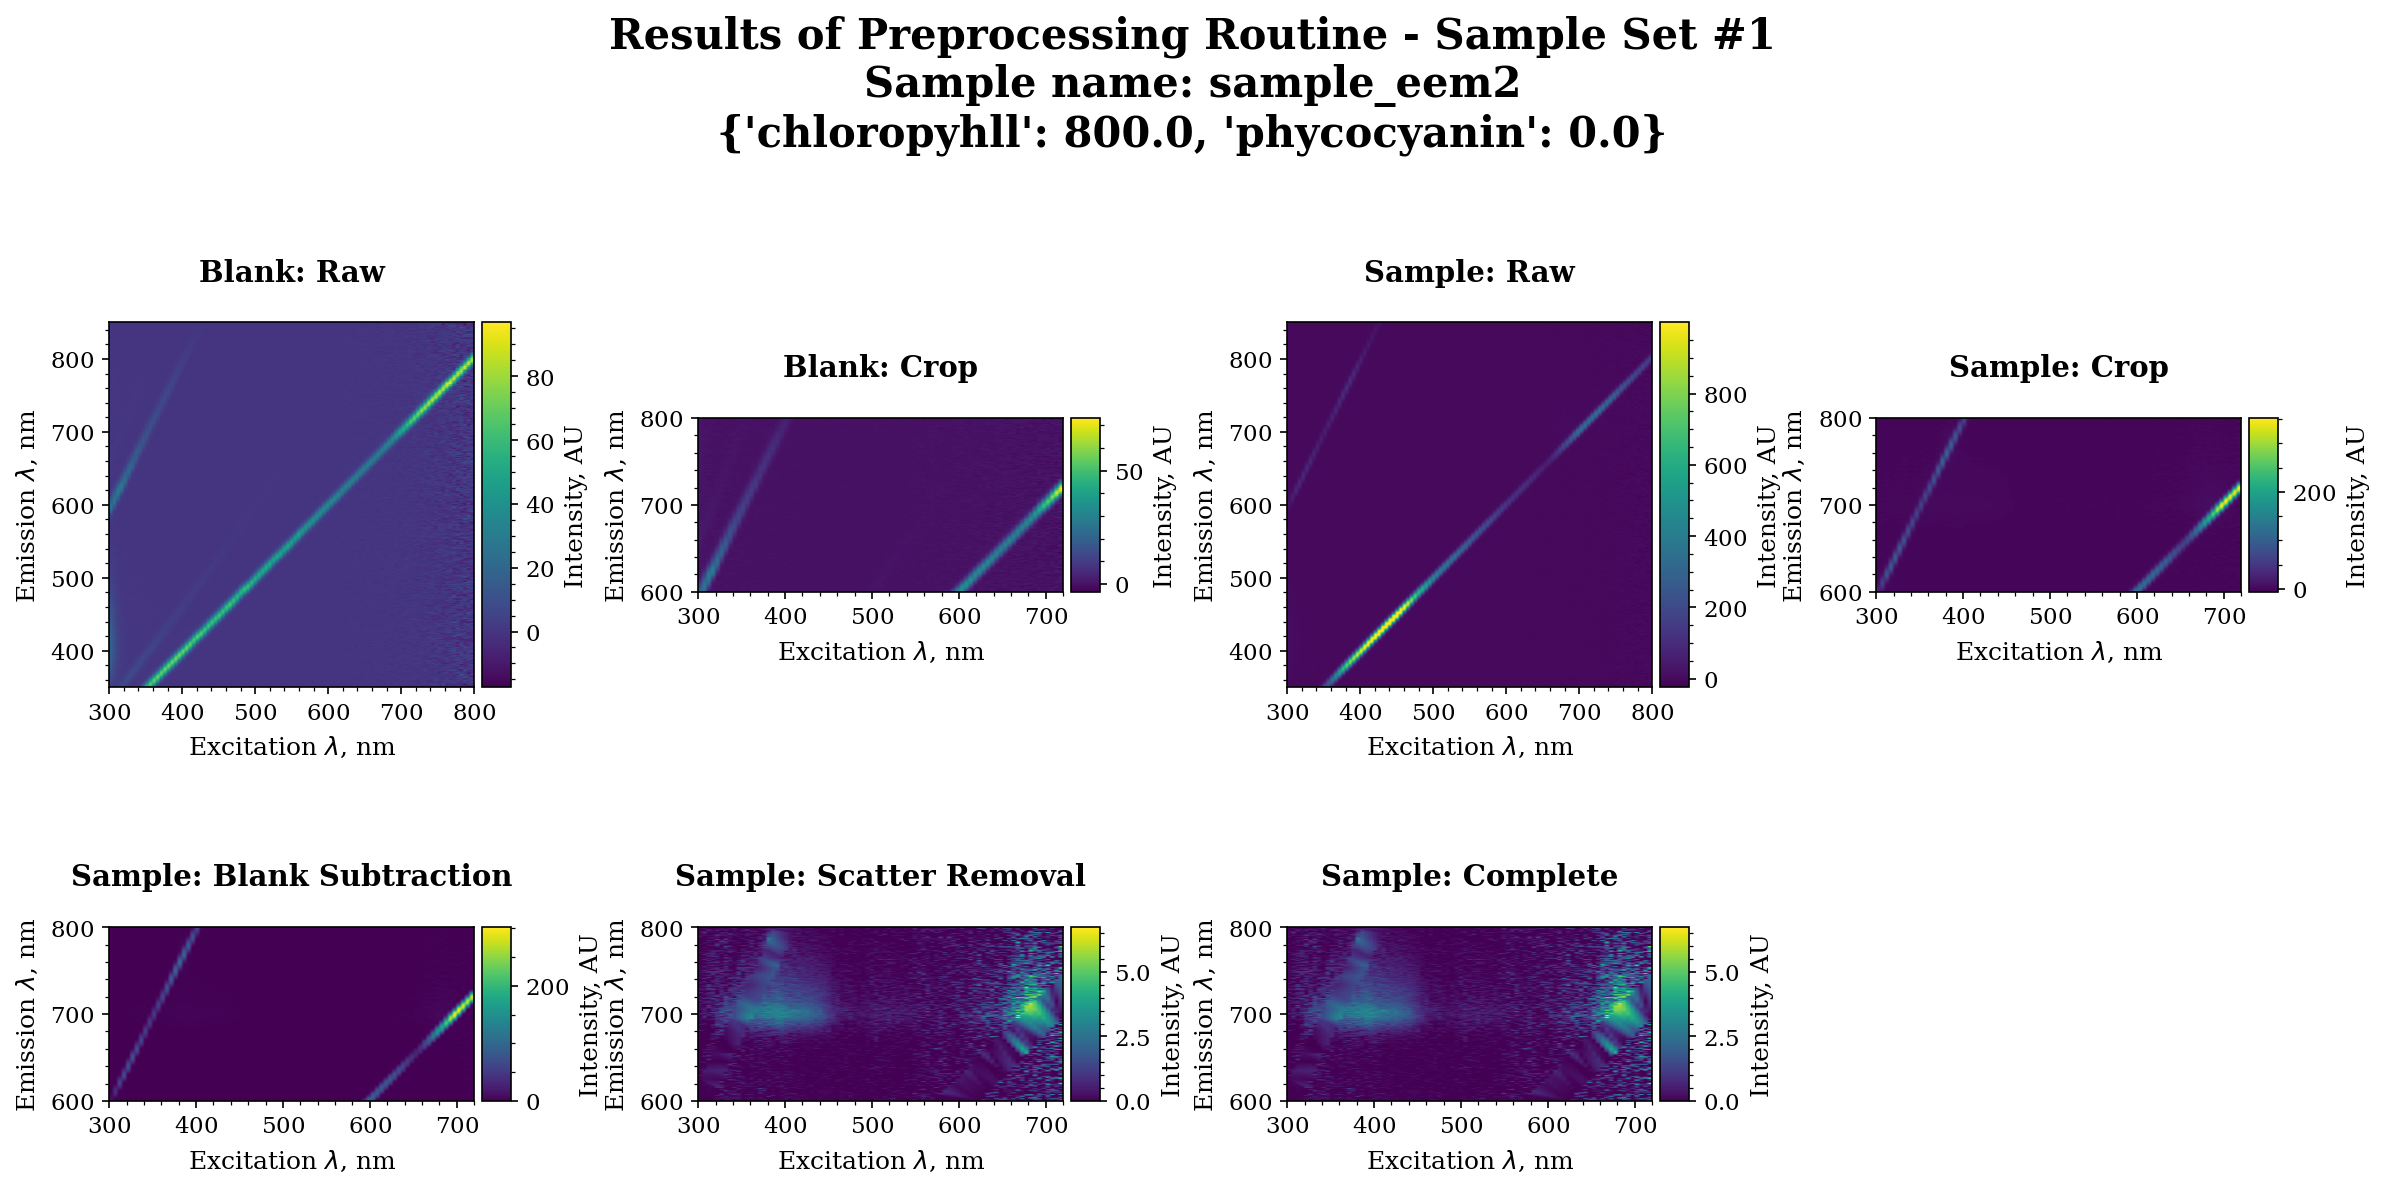

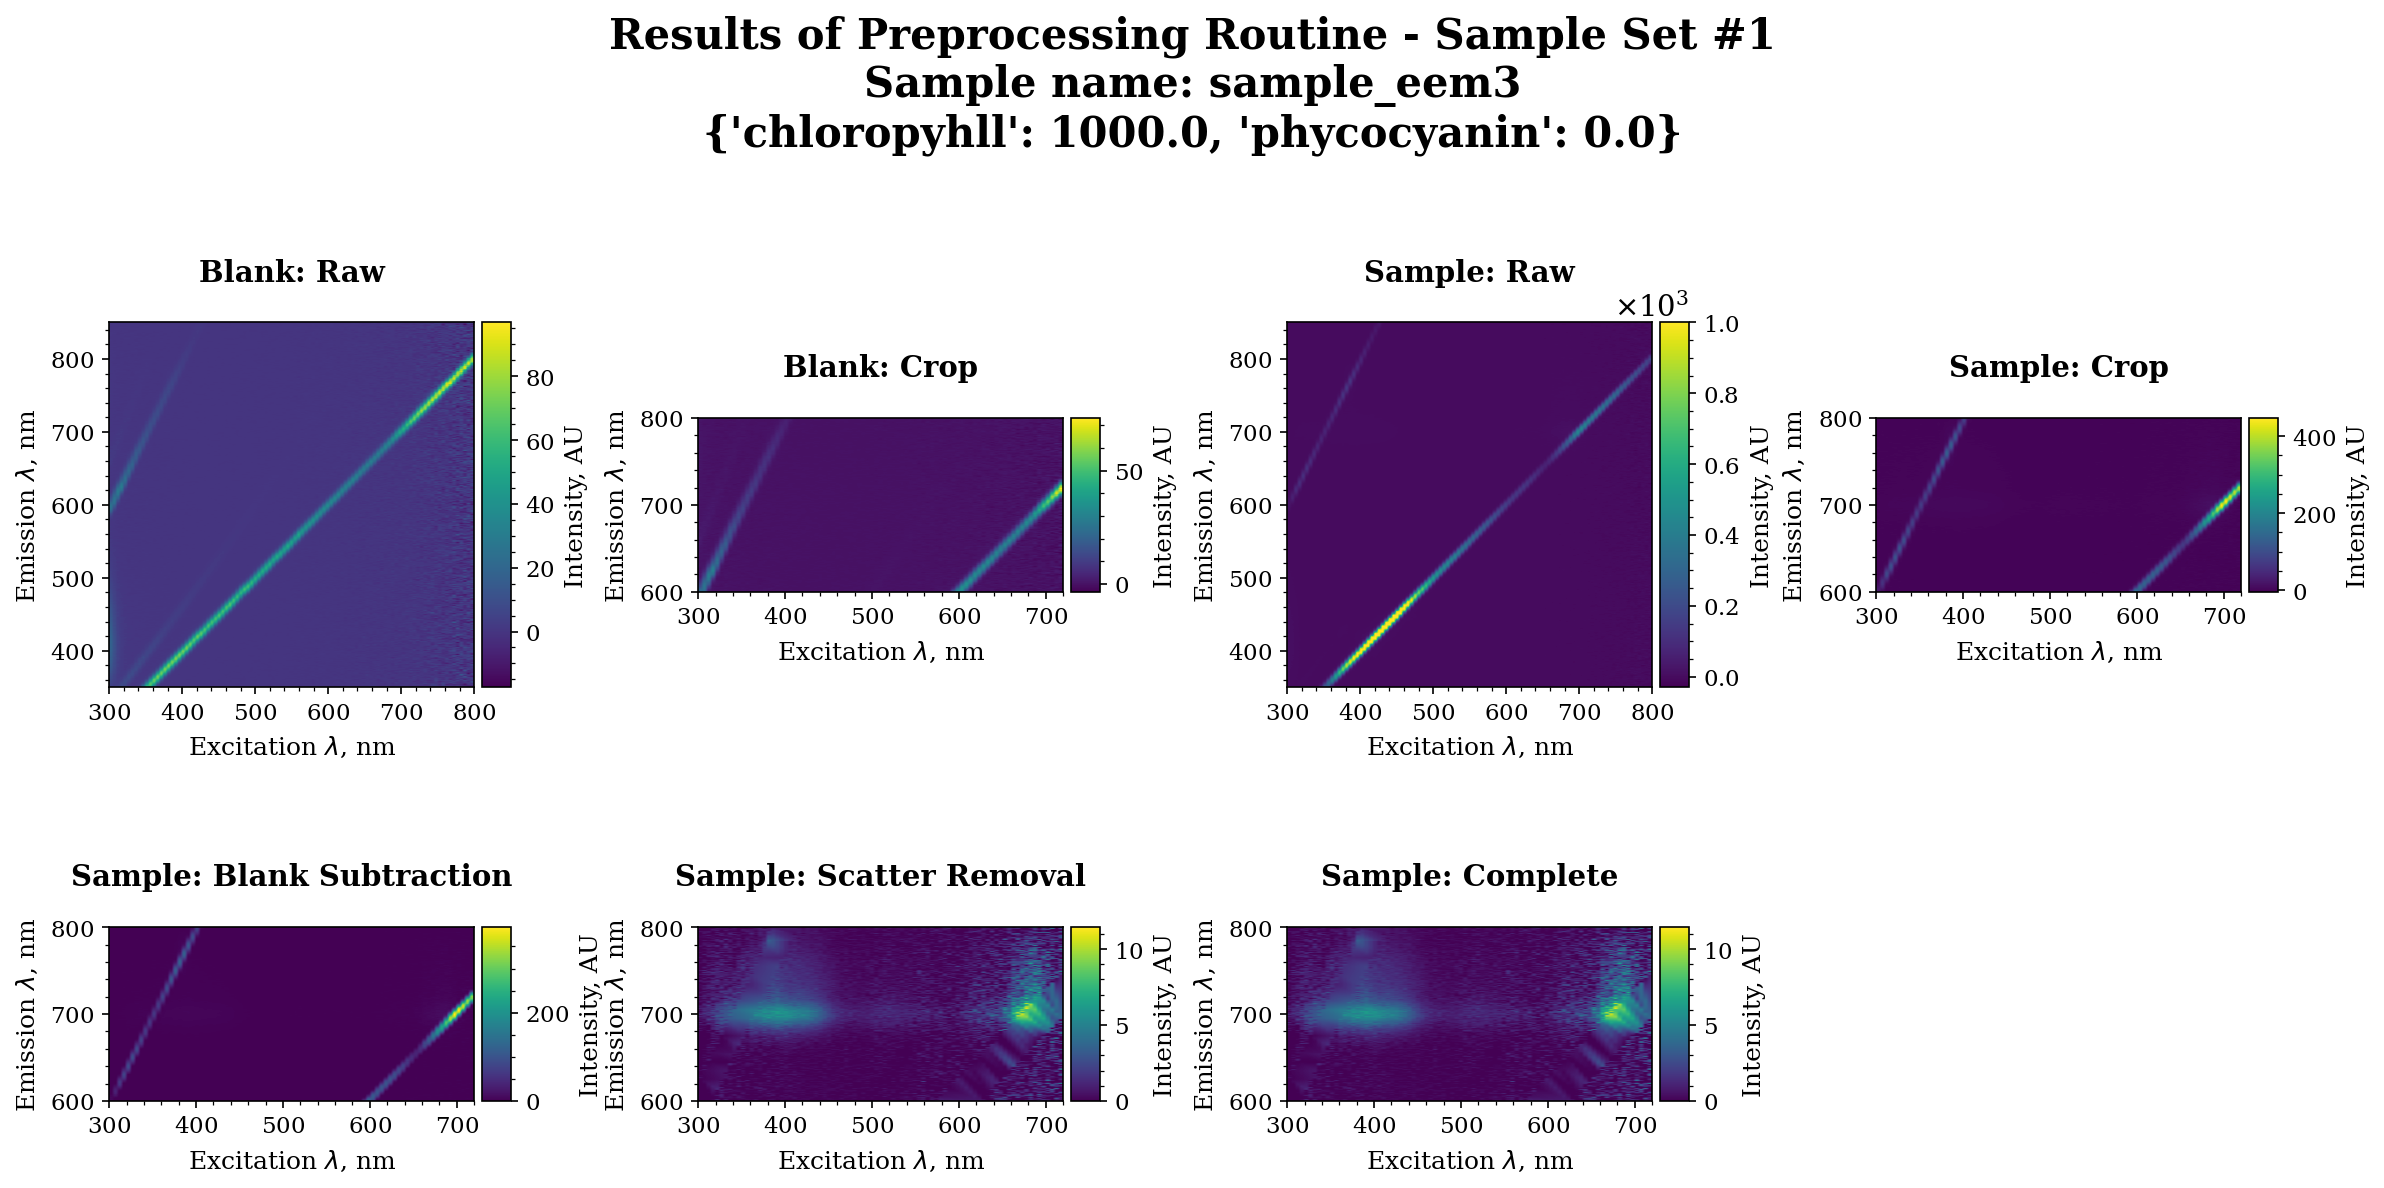

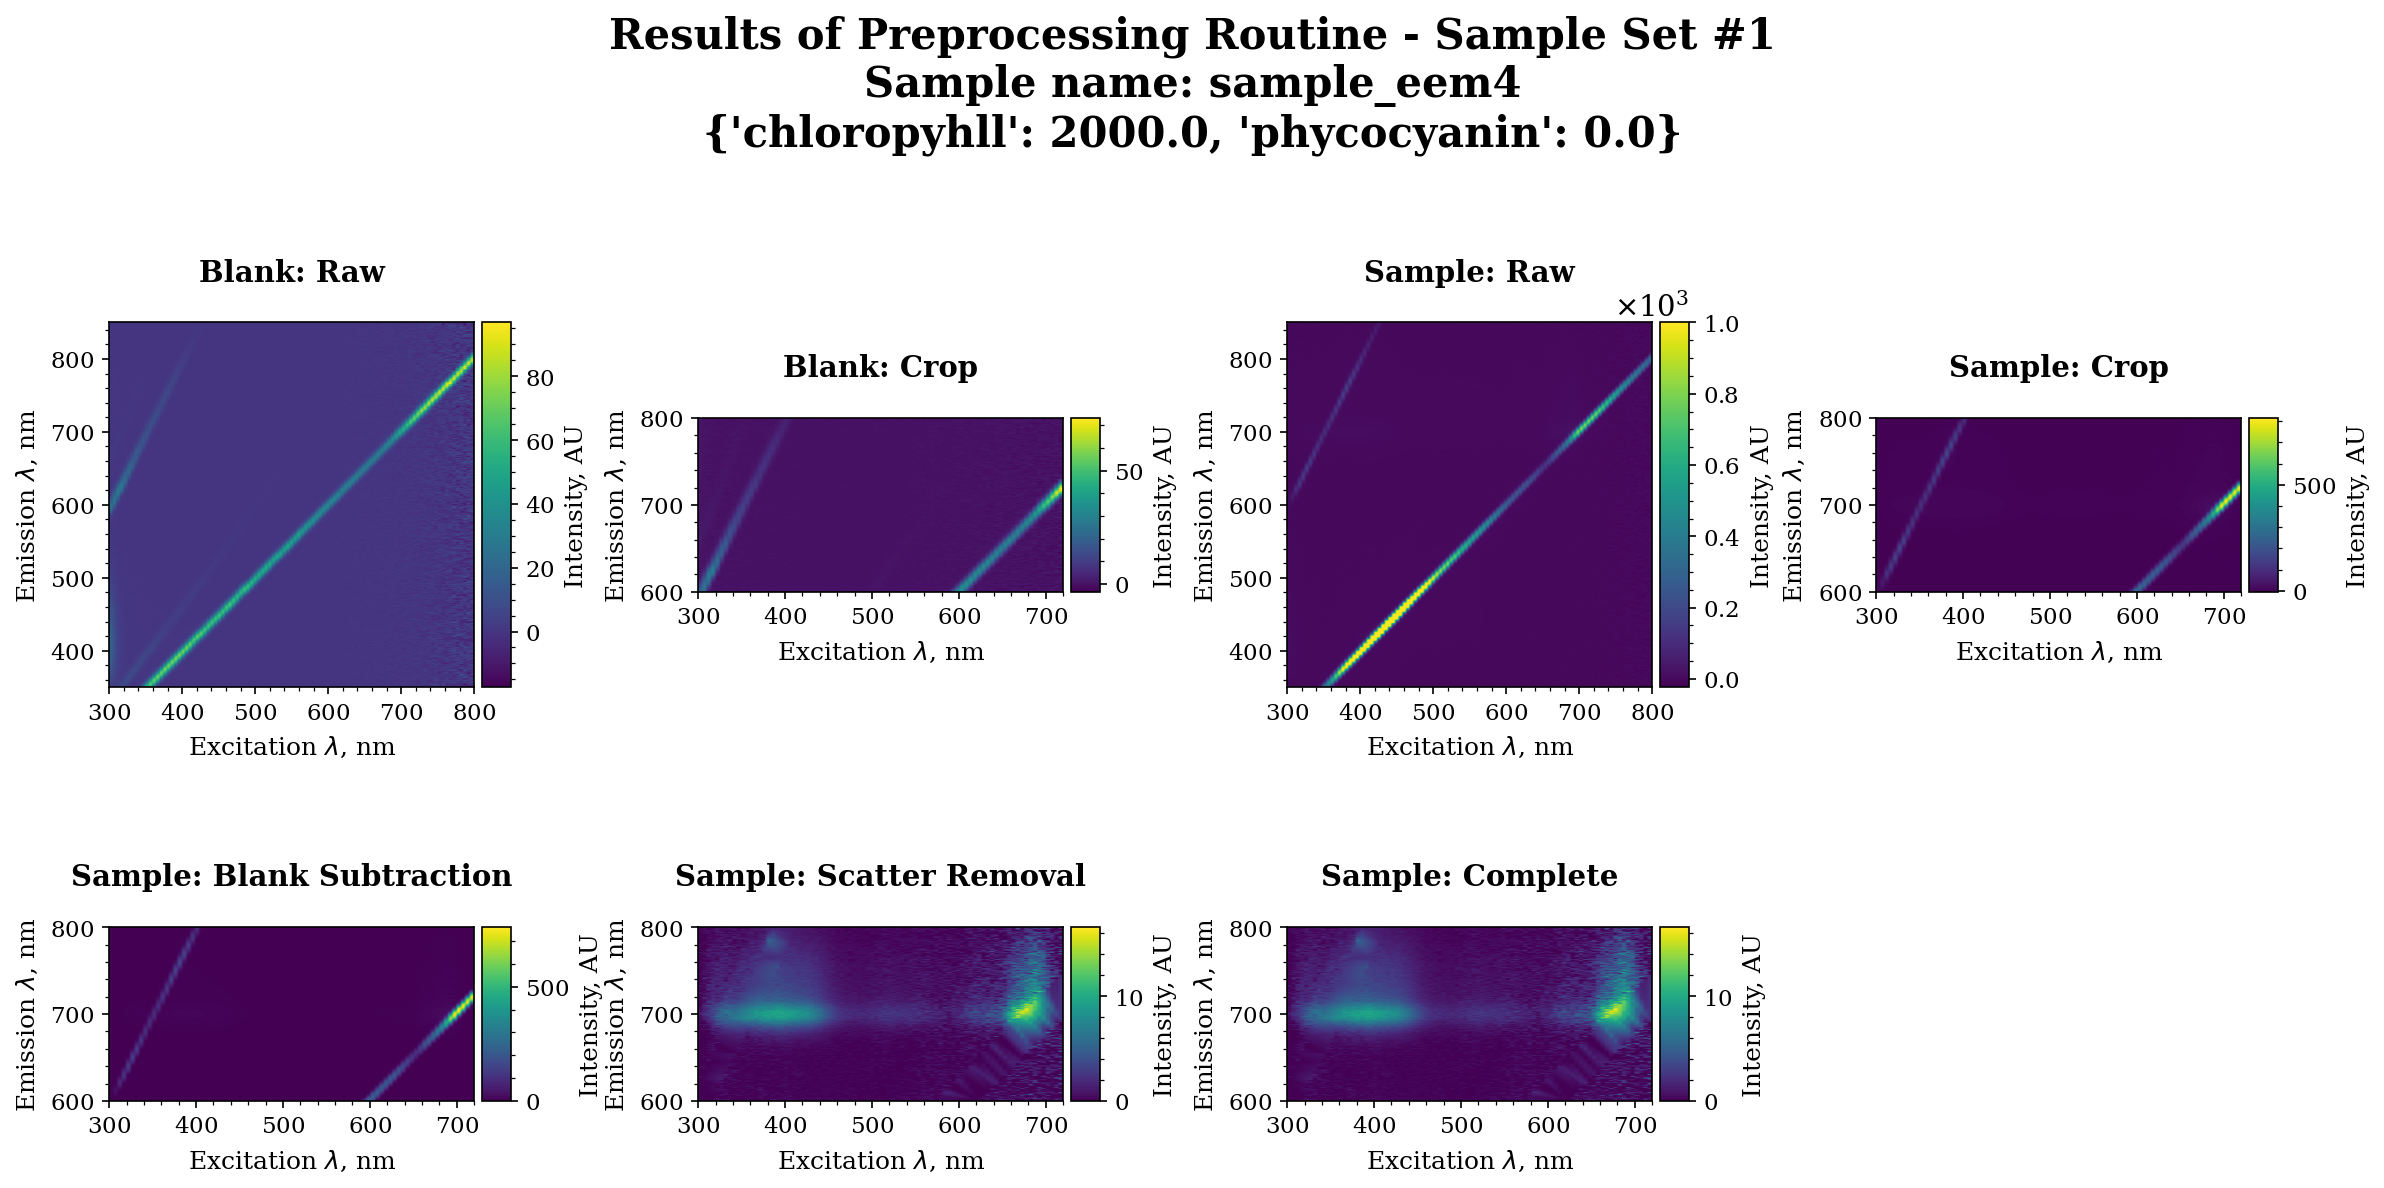

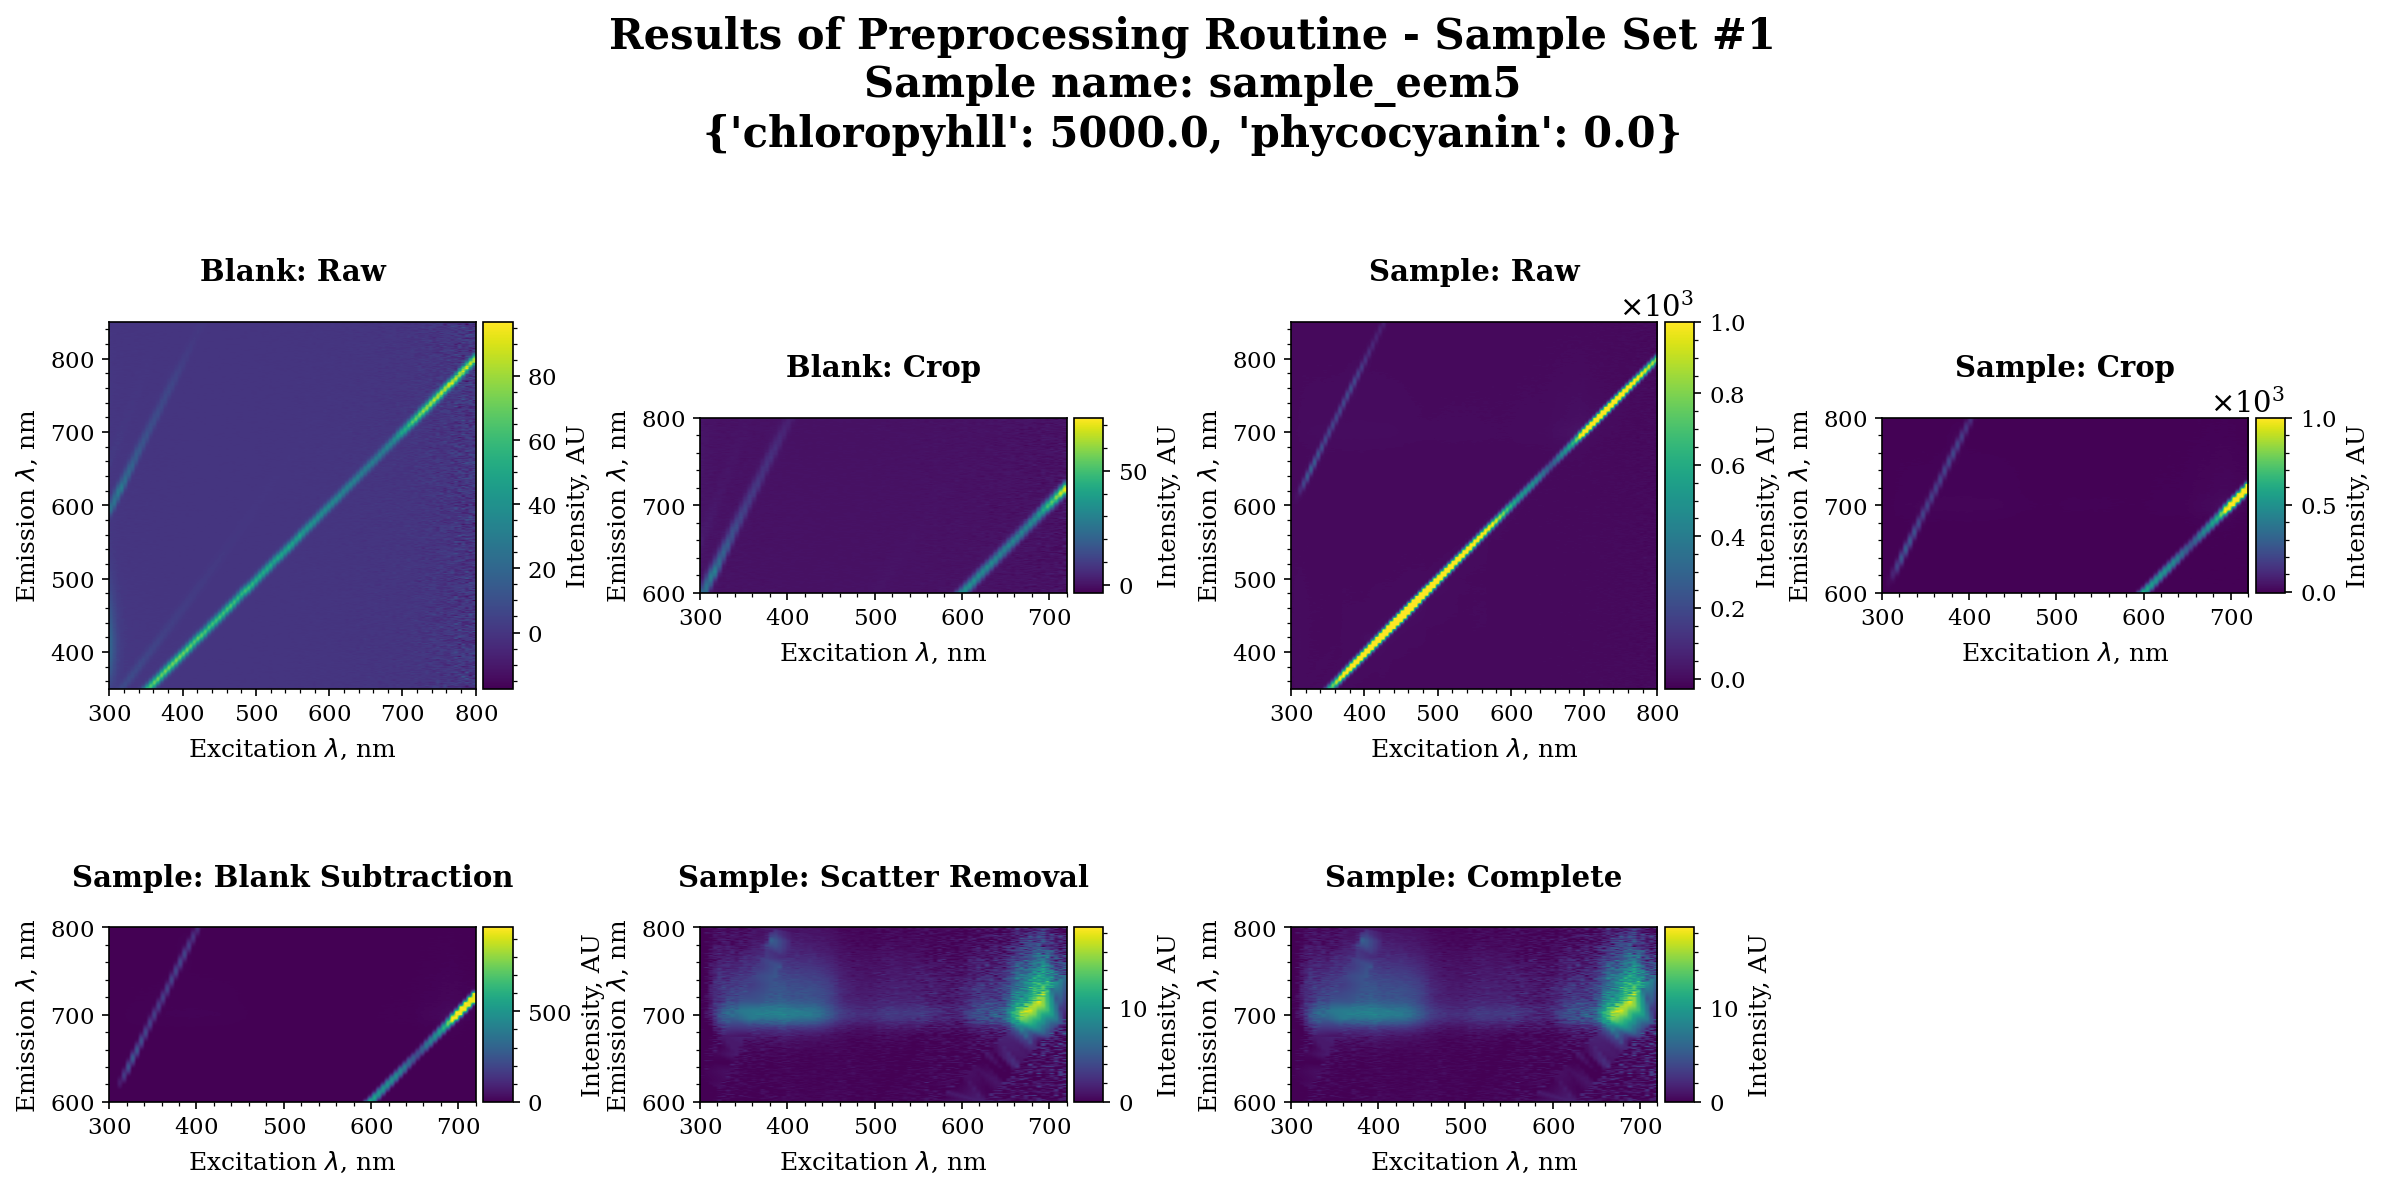

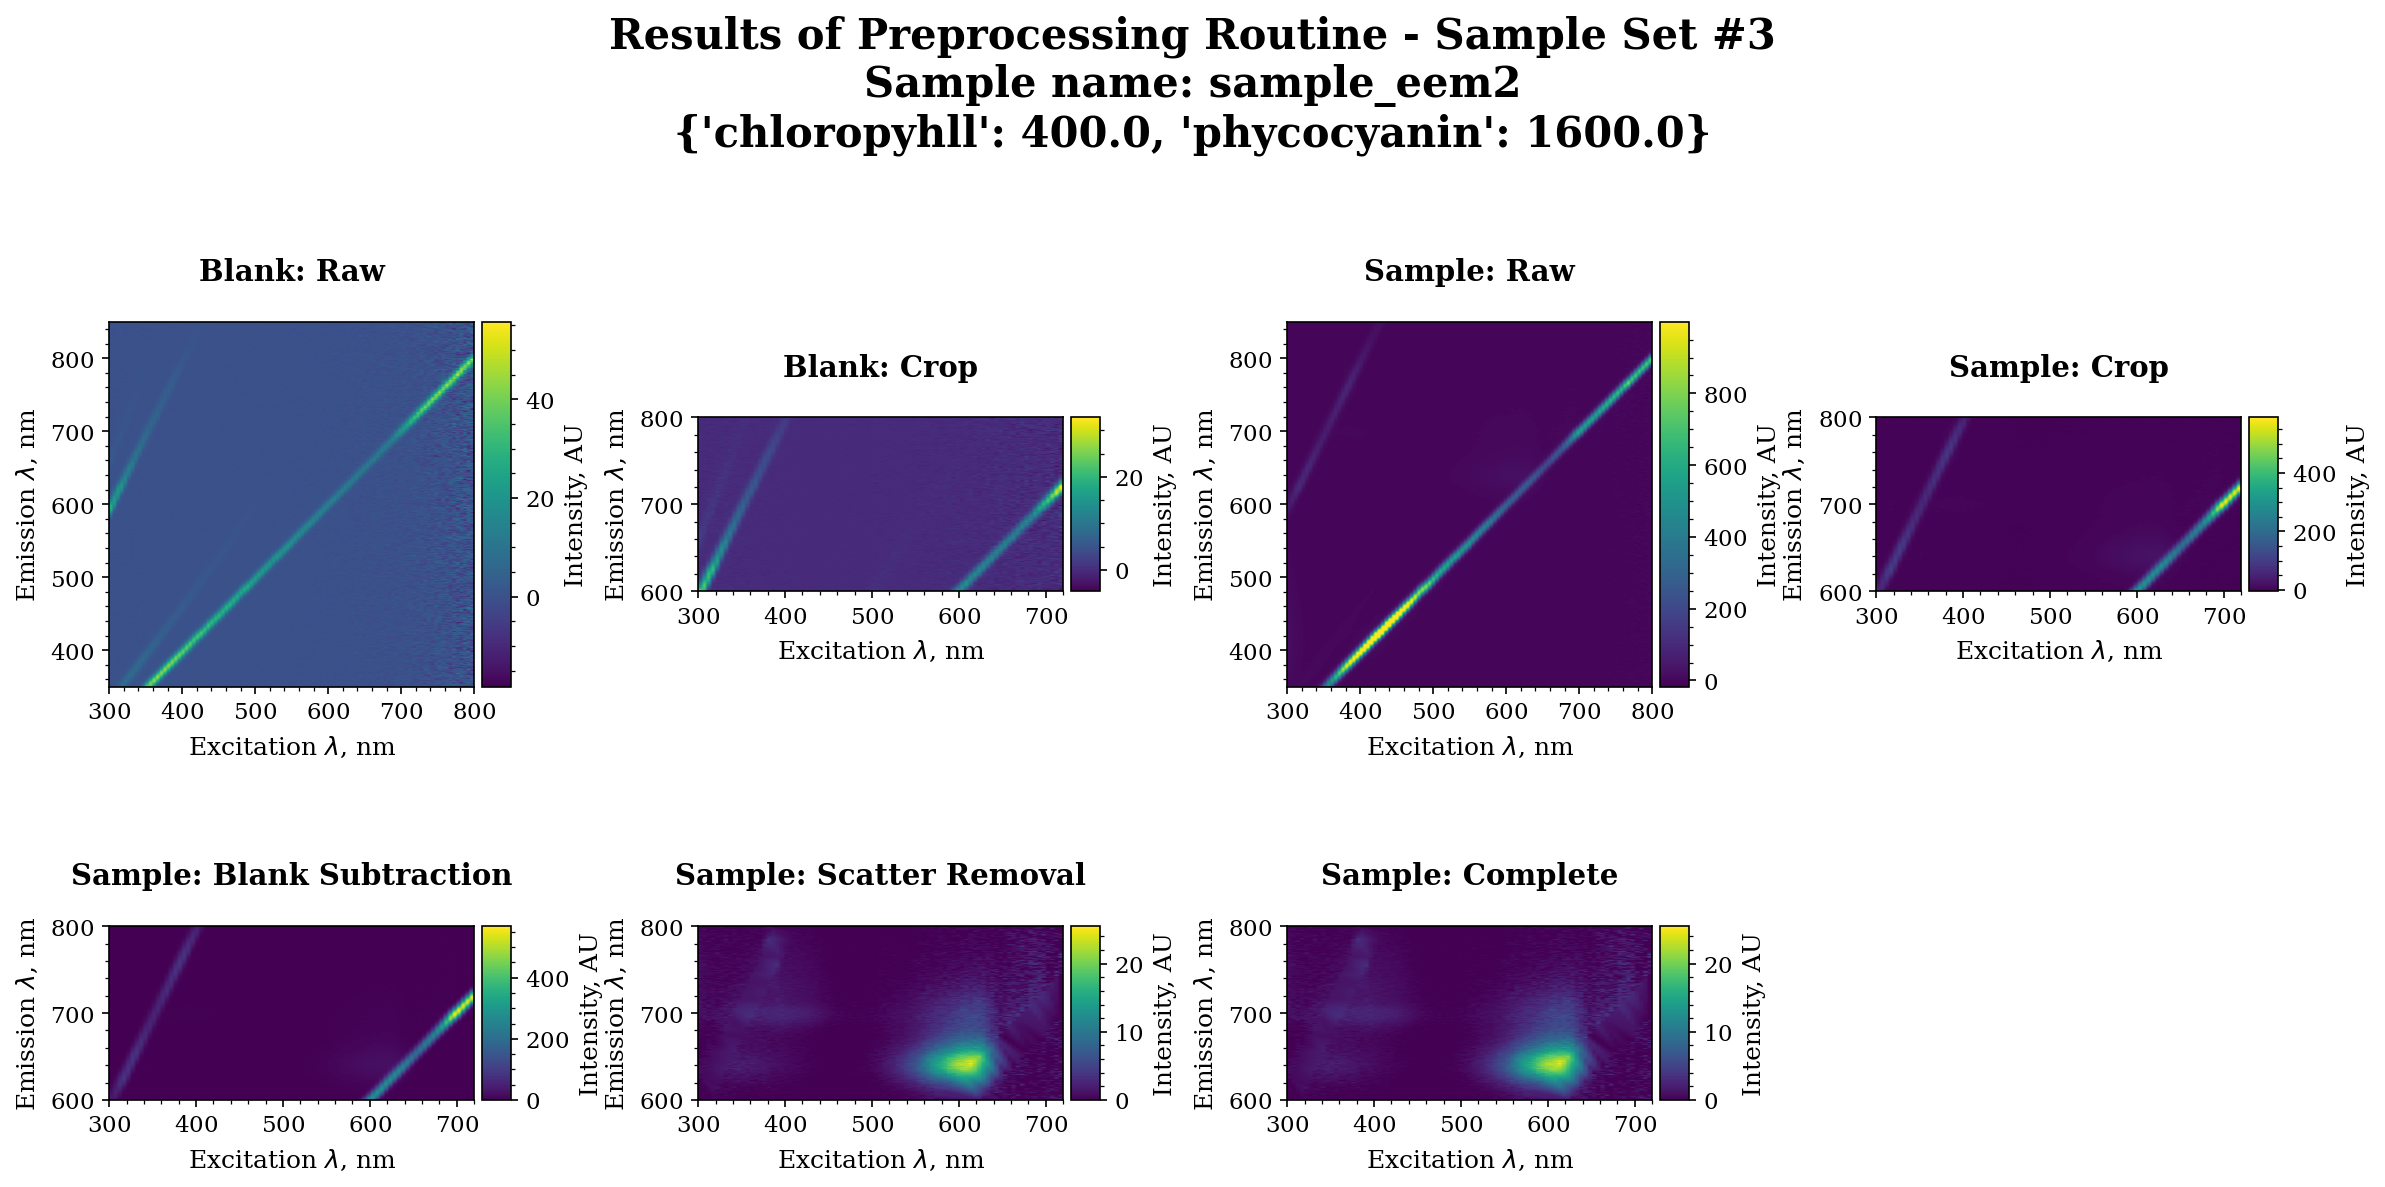

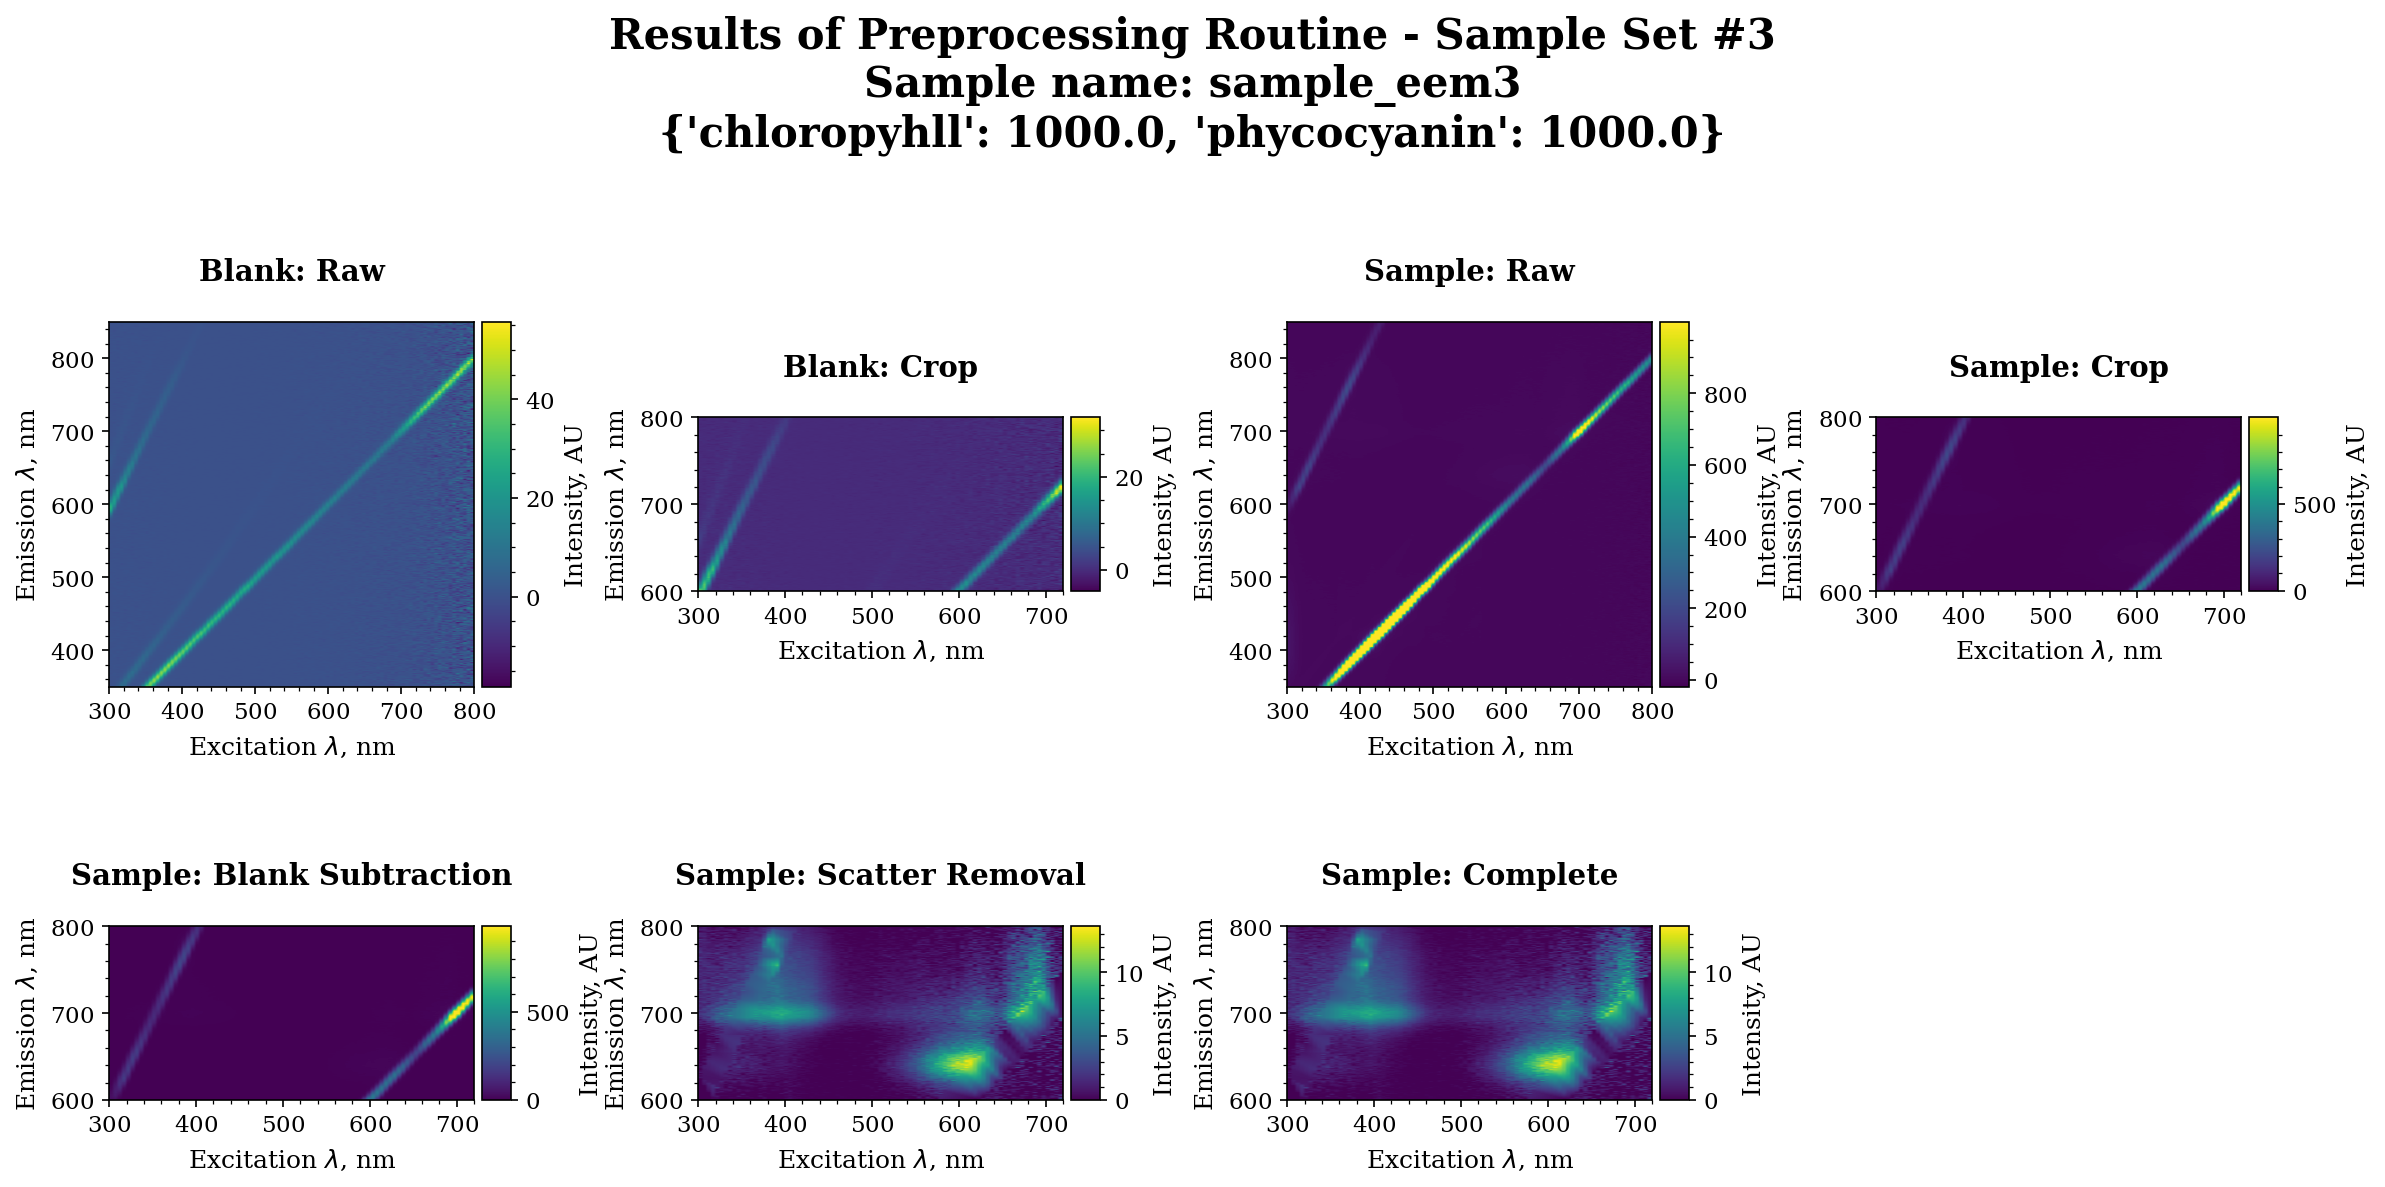

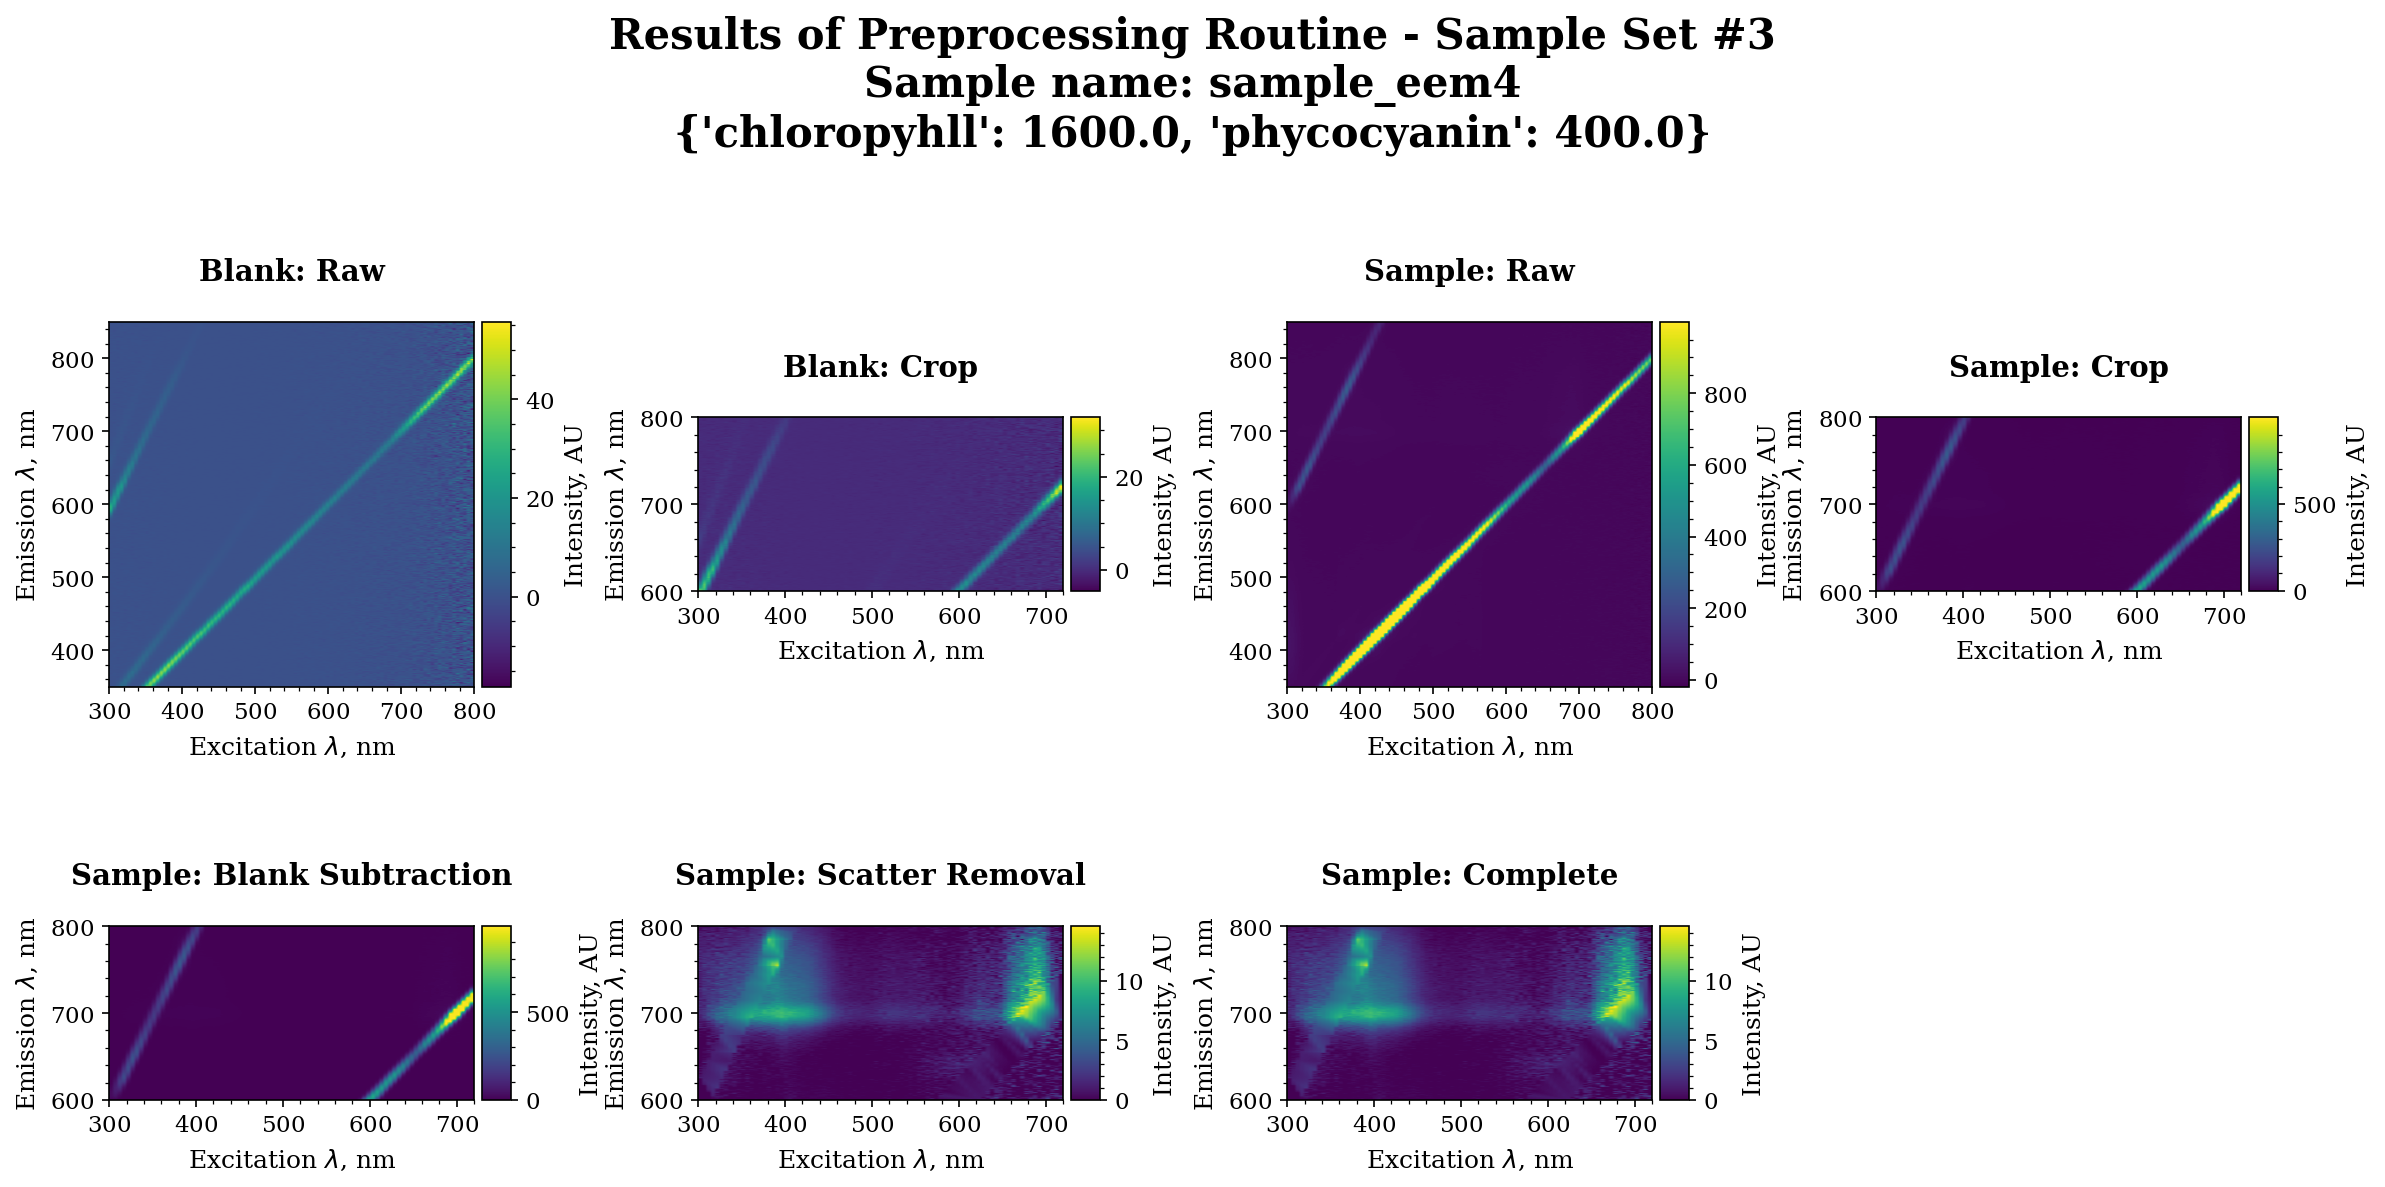

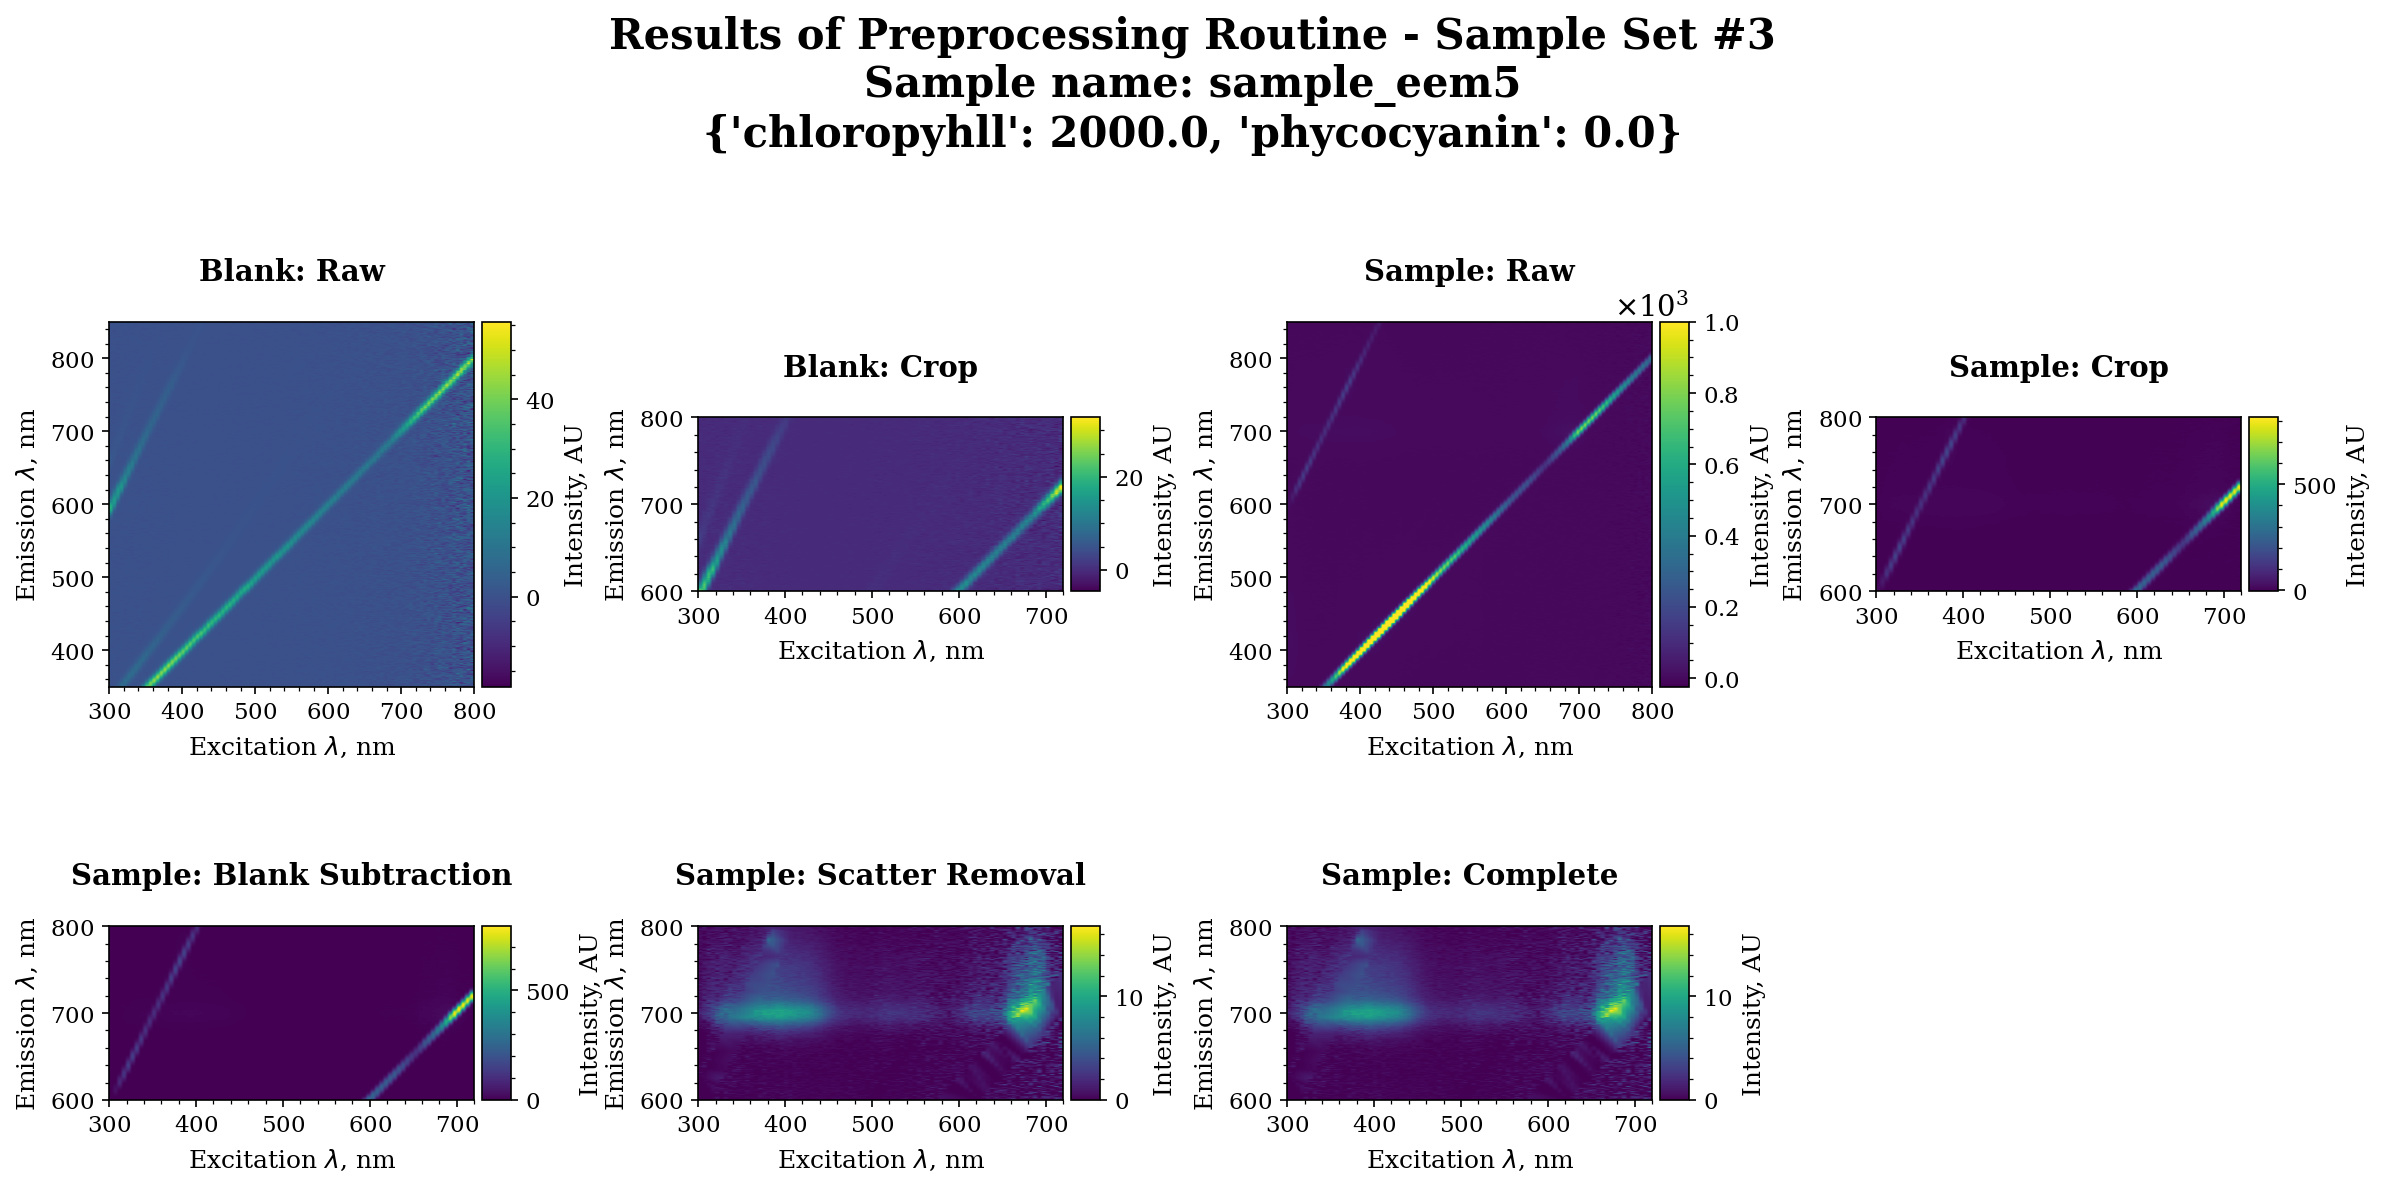

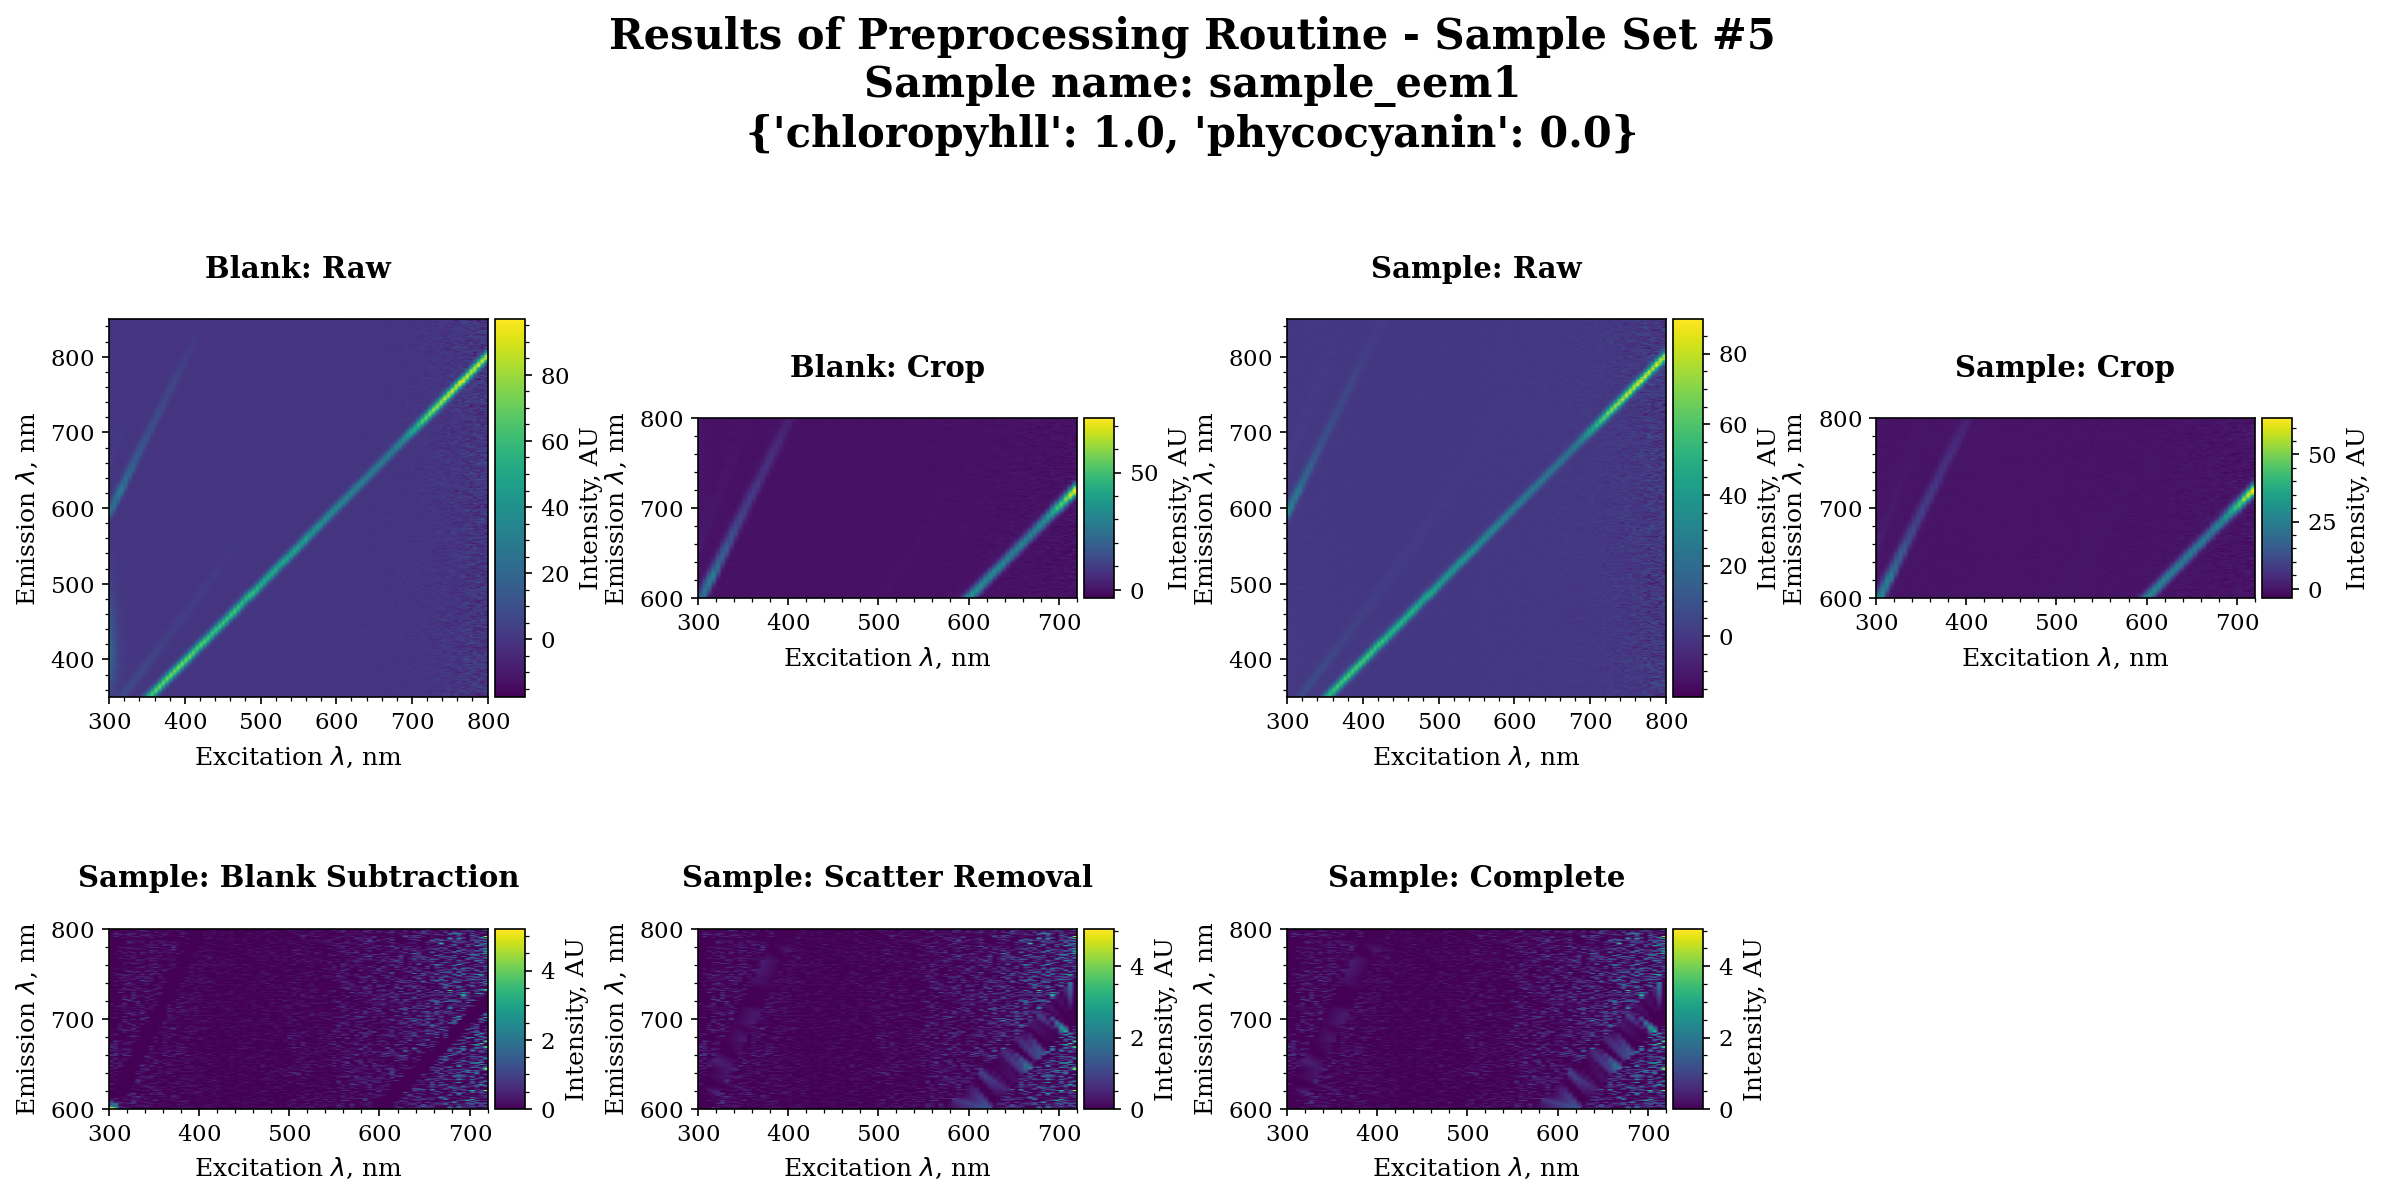

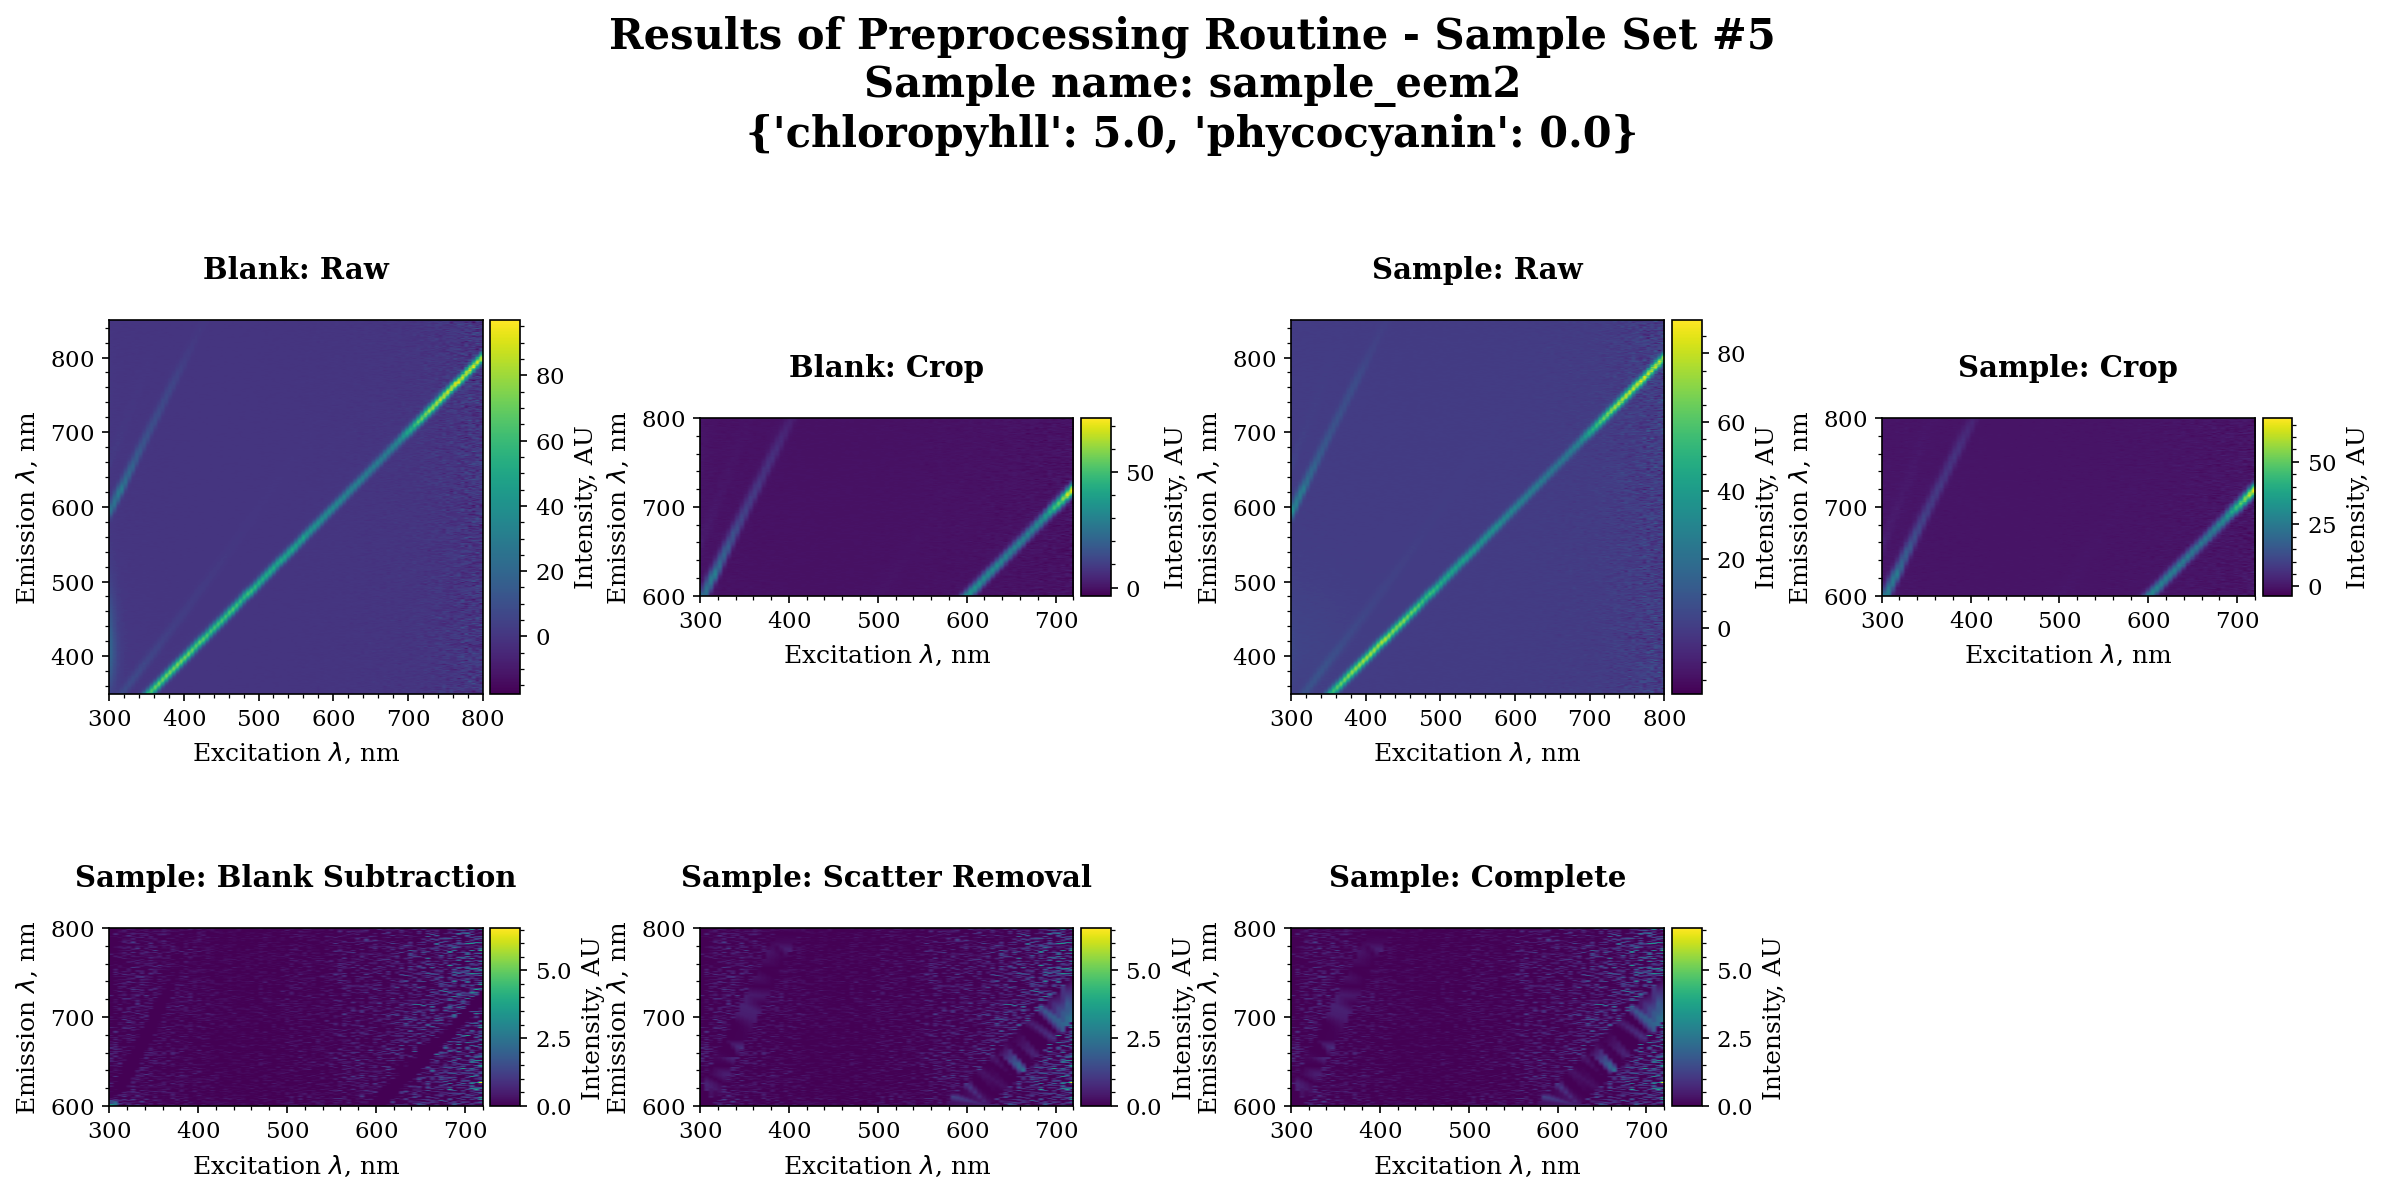

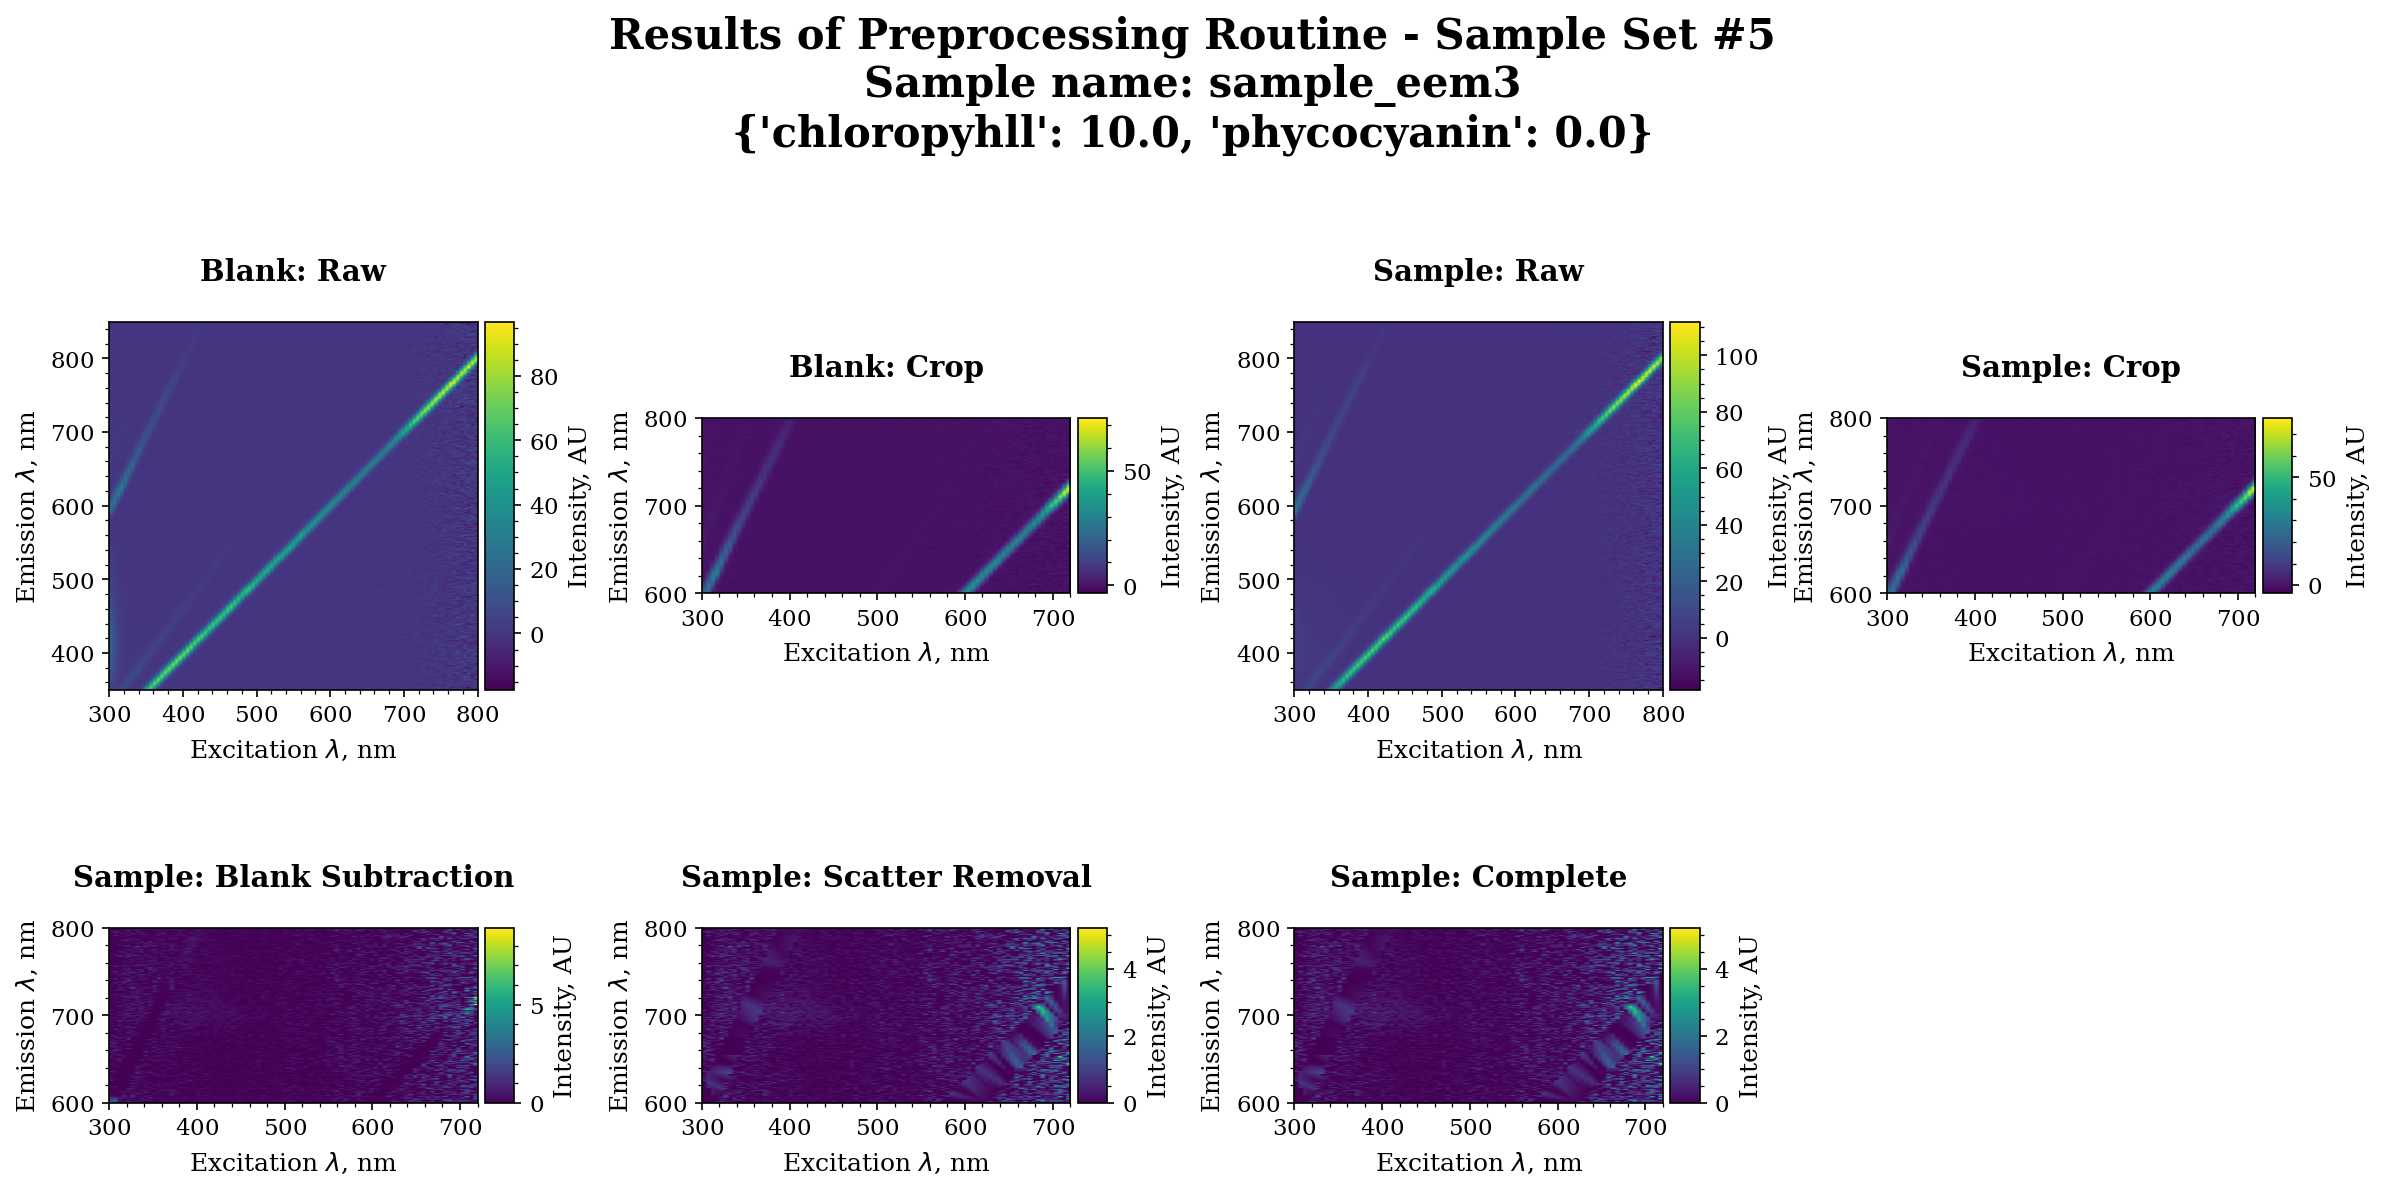

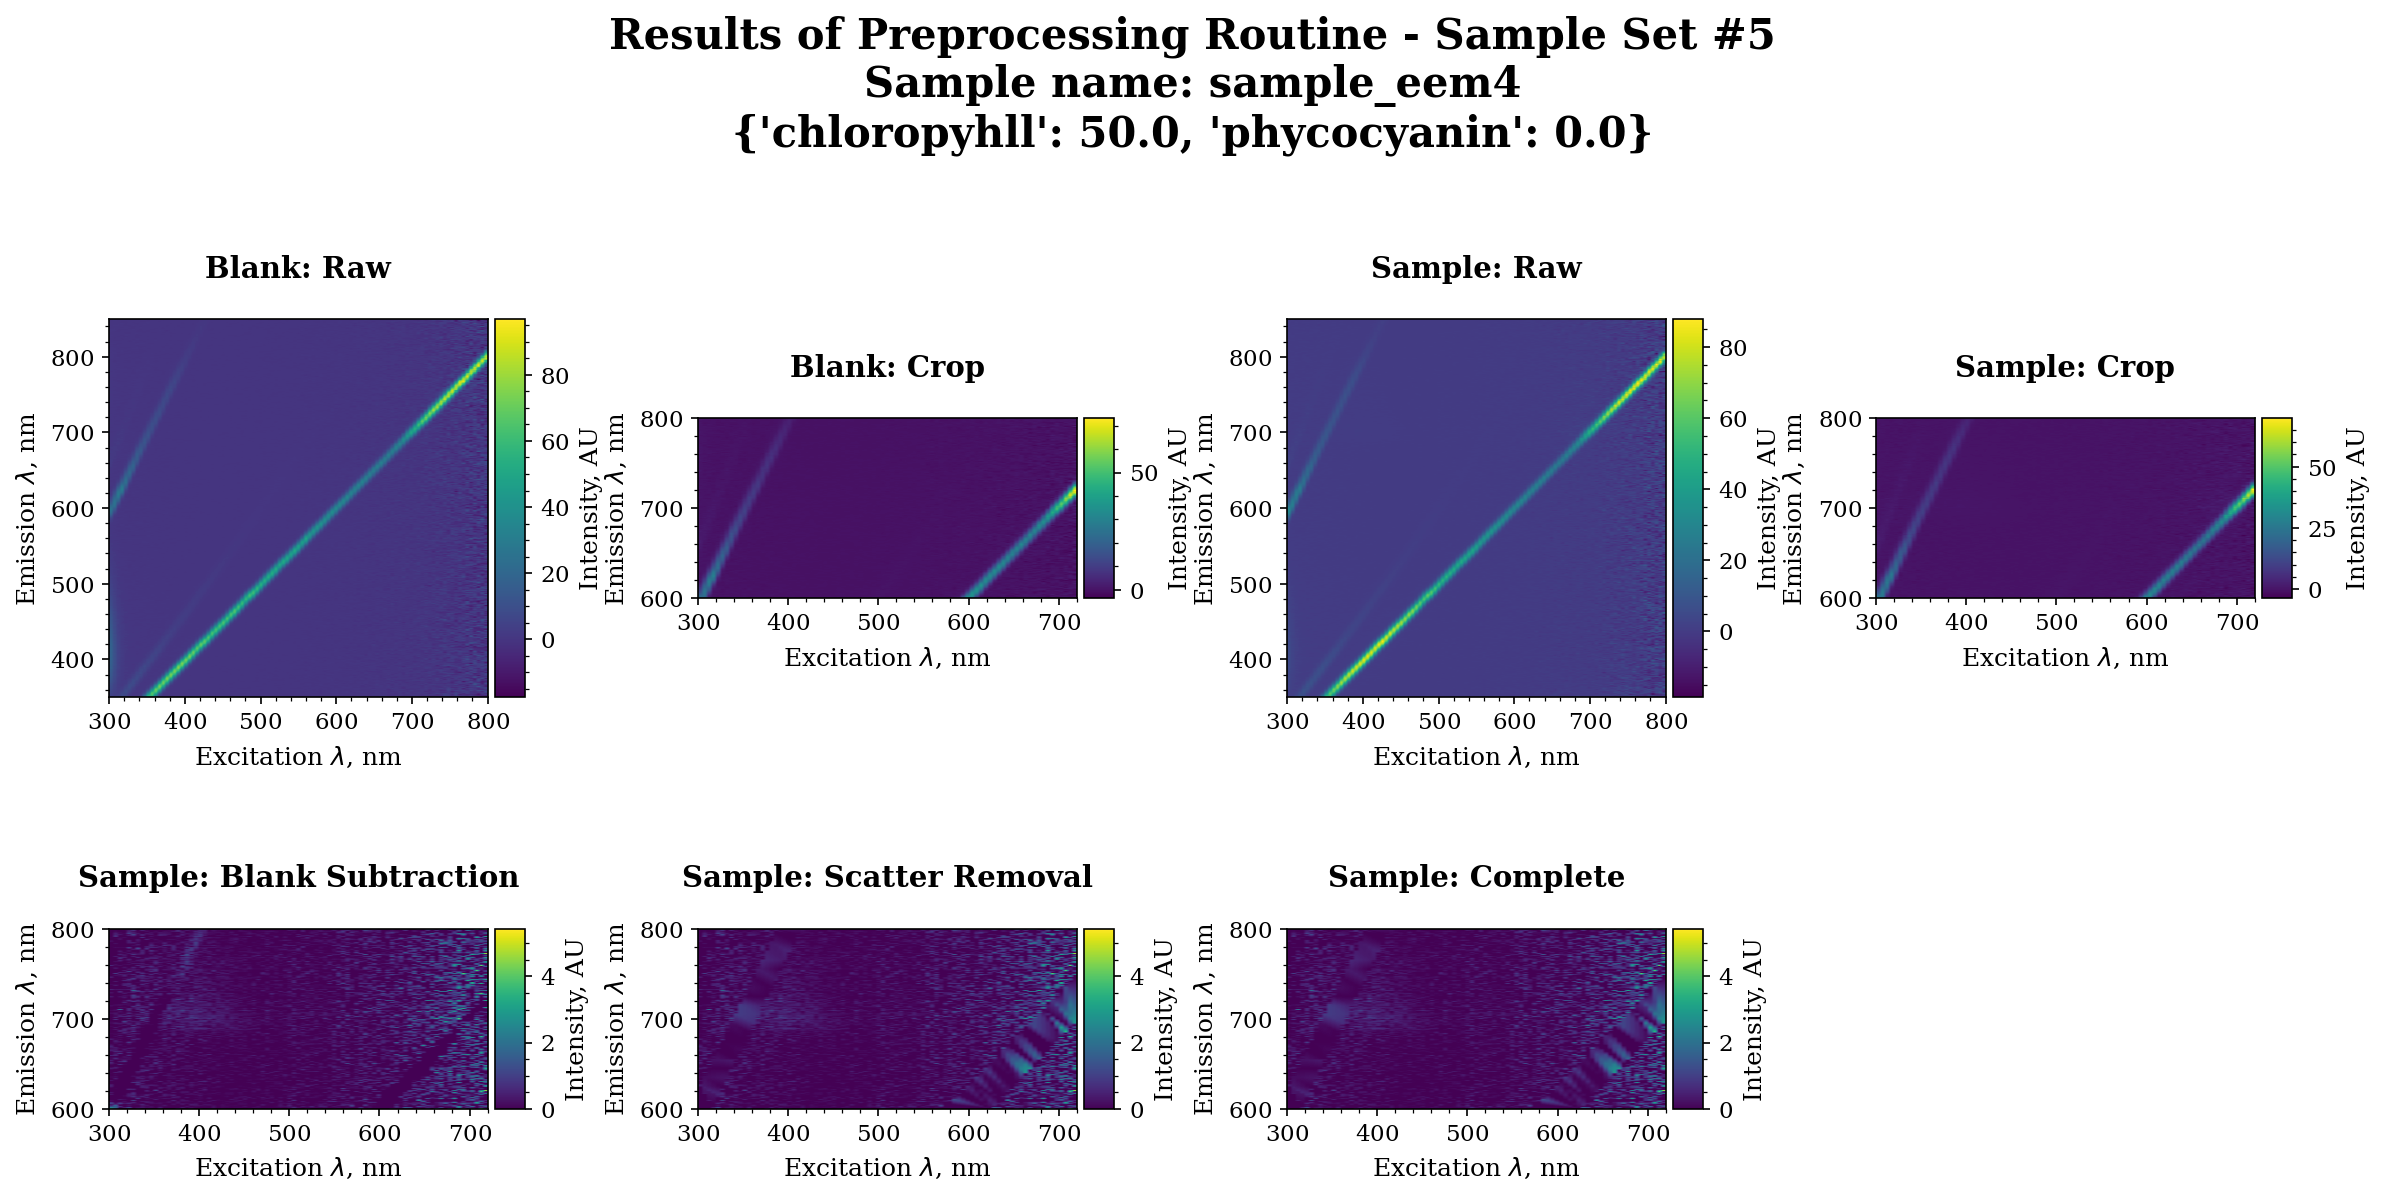

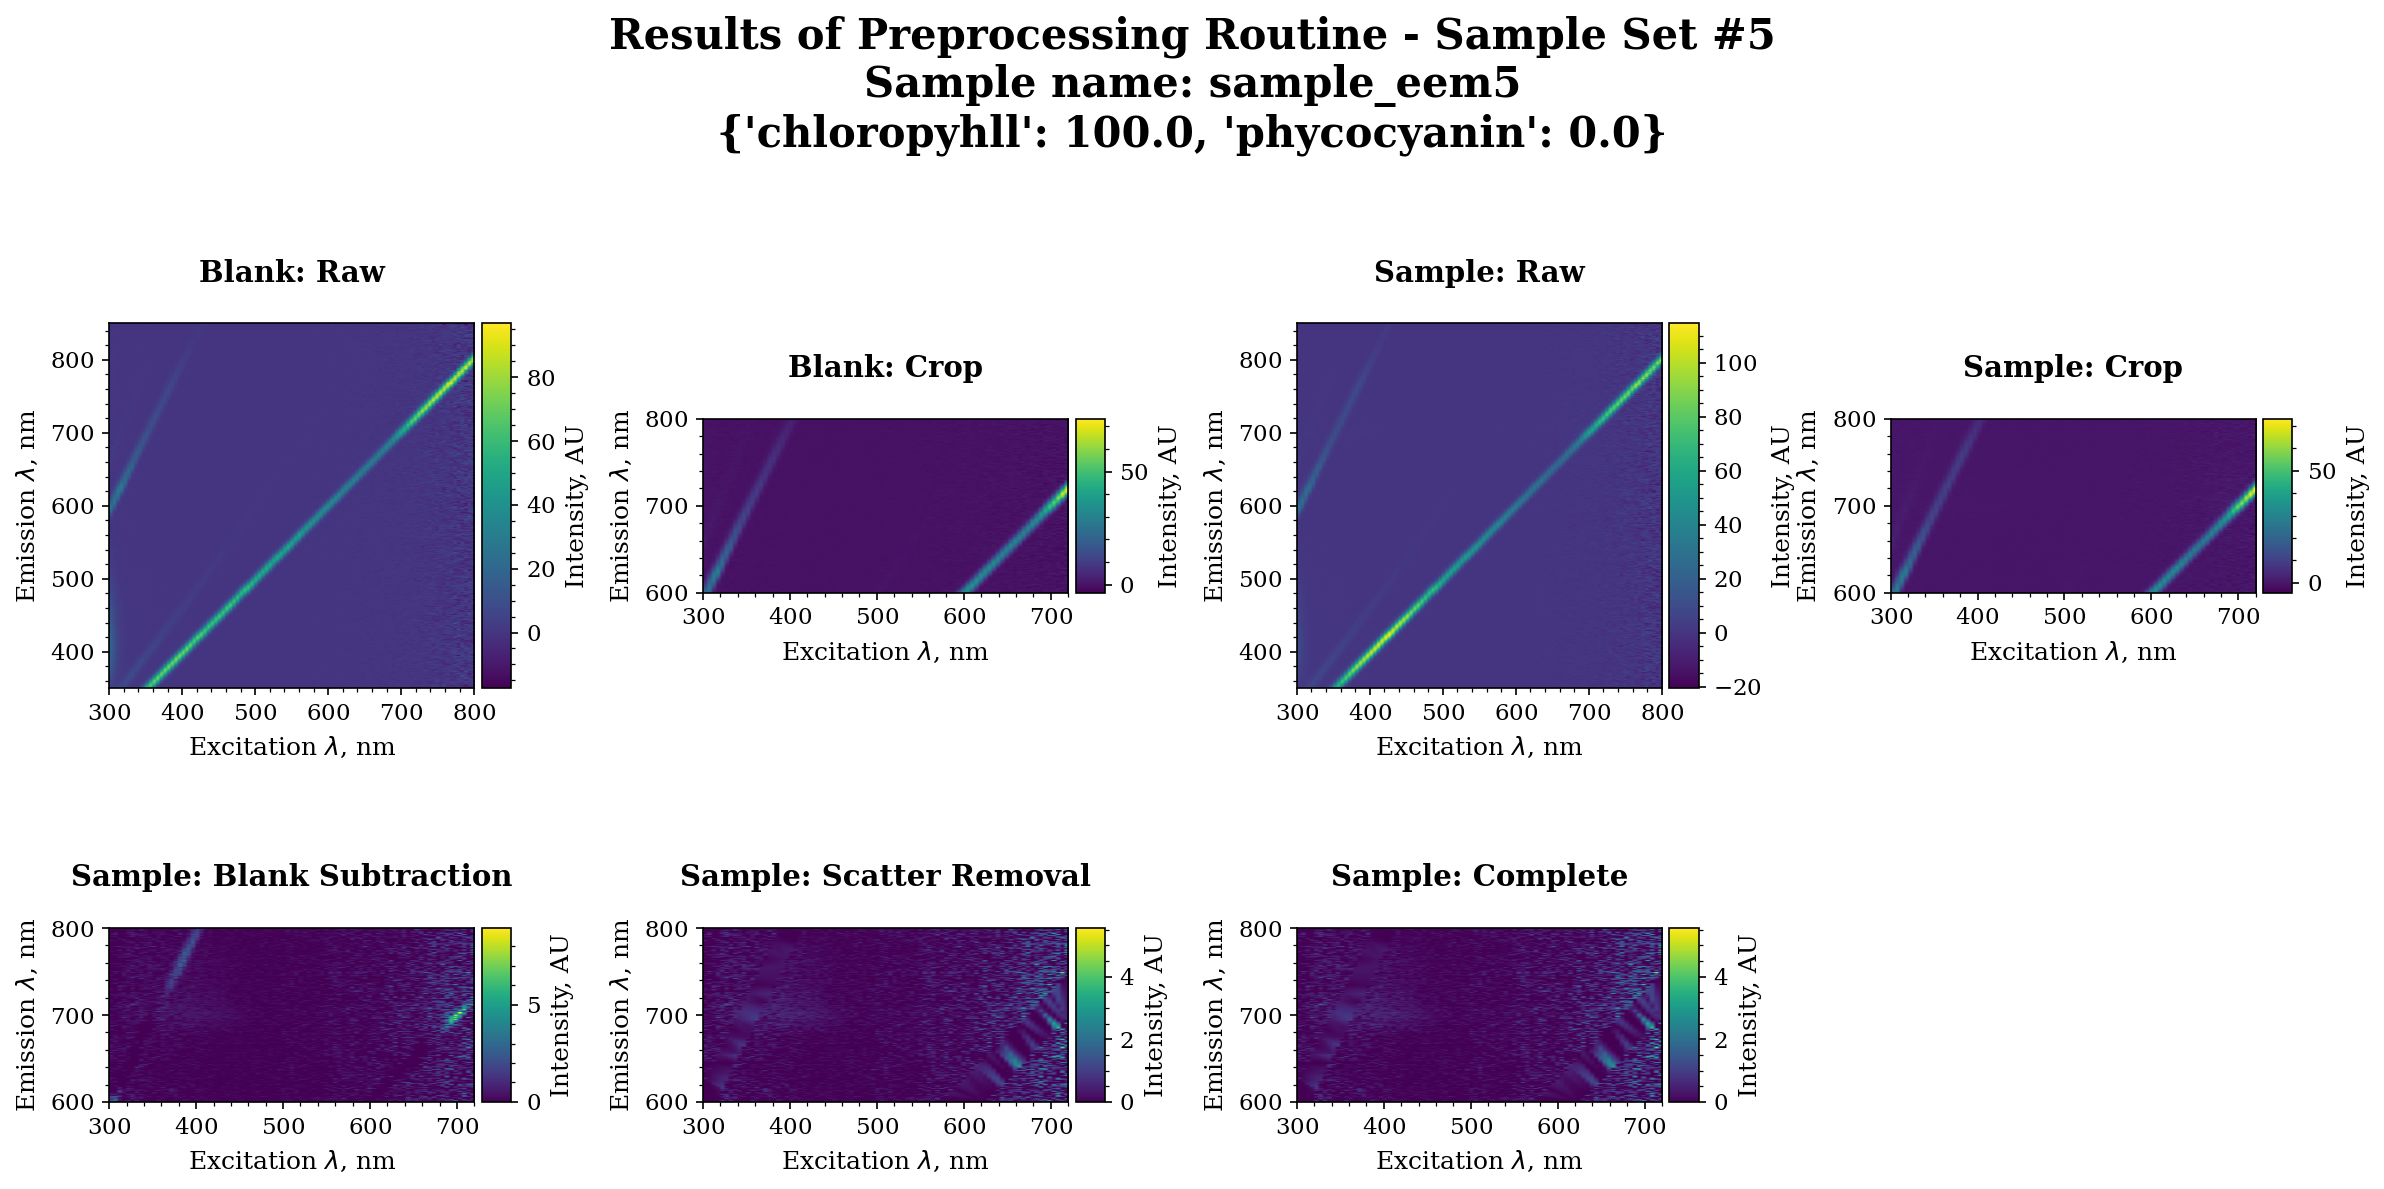

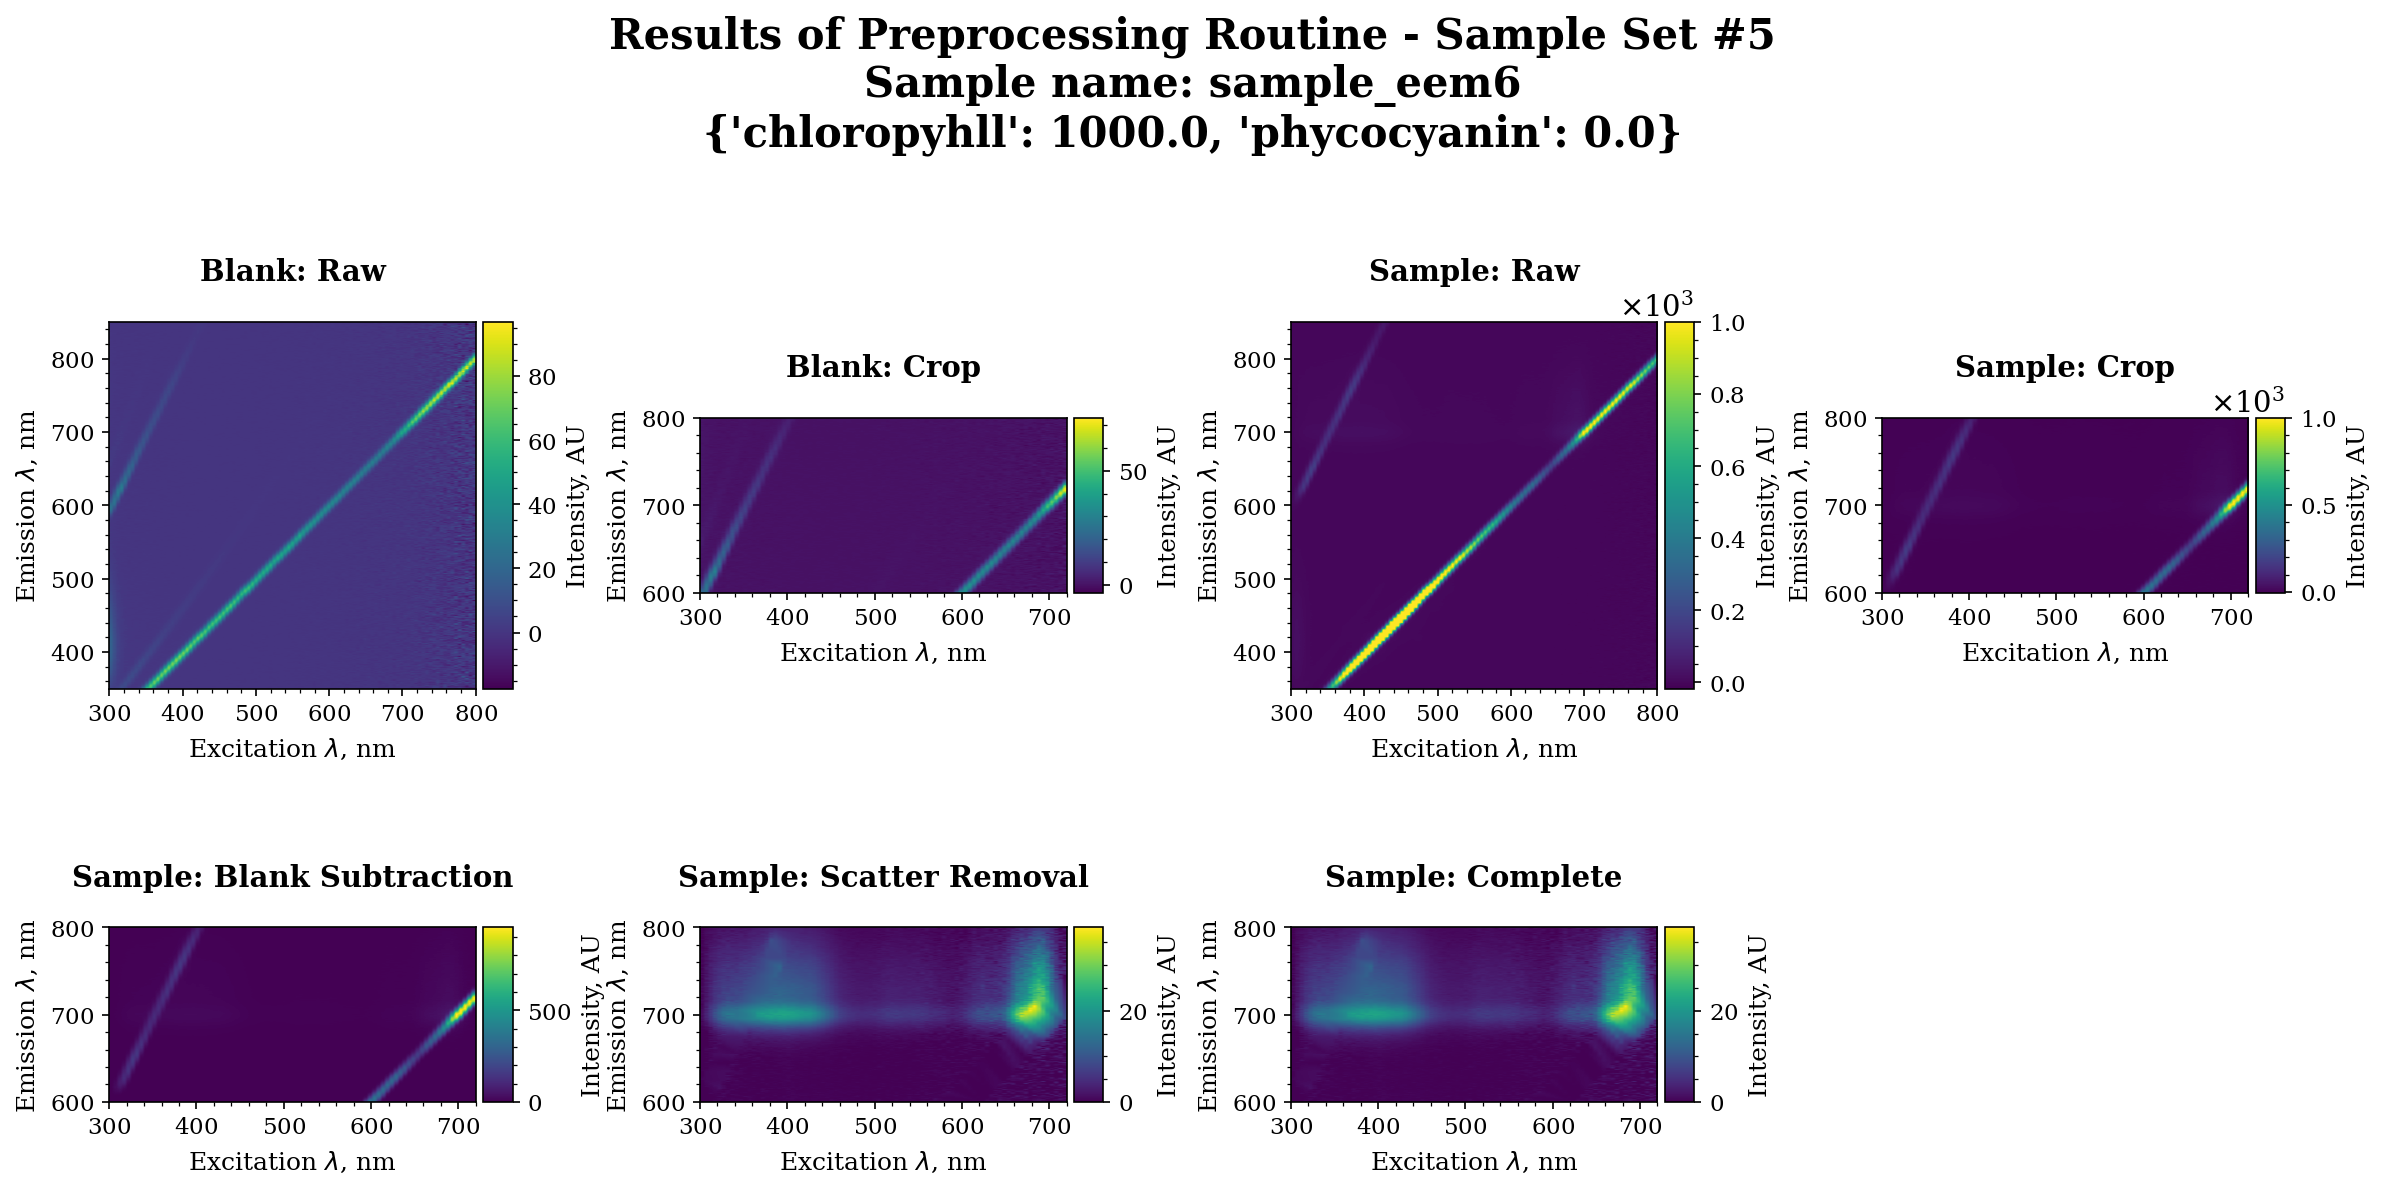

In [23]:
for group_name, group in dataset.meta_df.groupby(["sample_set", "name"]):
    """
    if not (
        group[dataset.calibration_sources.keys()].values[0][0] and 
        group[dataset.calibration_sources.keys()].values[0][1]
    ):
        continue
    """
    if not (
        group[dataset.calibration_sources.keys()].values[0][0]
    ):
        continue

    sample_set = group_name[0]
    sample_name = group_name[1]
    if "sample_eem" not in sample_name:
        continue

    # Custom suptitle for the plot to be passed as kwarg
    title = dict(zip(
        dataset.calibration_sources.keys(),
        group[dataset.calibration_sources.keys()].values[0]
    ))
    suptitle = "Results of Preprocessing Routine - Sample Set #{0}\nSample name: {1}".format(
        sample_set, sample_name
    )
    suptitle += "\n" + str(title)

    pyeem.plots.preprocessing.plot_preprocessing(
        dataset, 
        routine_results_df,
        sample_set,
        sample_name,
        plot_type="imshow",
        include_complete=True,
        suptitle = suptitle,
        fig_kws={"dpi": 150}
    )
    plt.show()

In [17]:
cal_df = pyeem.preprocessing.calibration(
    dataset, routine_results_df
)

In [18]:
display(cal_df)

concentration  \
source      source_units intensity_units measurement_units        slope     intercept   r_squared                  
chloropyhll ug/L         Intensity, AU   Integrated Intensity, AU 6.864139  5459.737256 0.859773           500.0   
                                                                                        0.859773           800.0   
                                                                                        0.859773          1000.0   
                                                                                        0.859773          2000.0   
                                                                                        0.859773          5000.0   
                                                                                        0.859773          2000.0   
                                                                                        0.859773             1.0   
                                                                                        0.859773             5.0   
                                                                                        0.859773            10.0   
                                                                                        0.859773            50.0   
                                                                                        0.859773           100.0   
phycocyanin ug/L         Intensity, AU   Integrated Intensity, AU 25.797674 9220.840790 0.862242           500.0   
                                                                                        0.862242           800.0   
                                                                                        0.862242          1000.0   
                                                                                        0.862242          2000.0   
                                                                                        0.862242          5000.0   
                                                                                        0.862242          2000.0   

                                                                                                   integrated_intensity  \
source      source_units intensity_units measurement_units        slope     intercept   r_squared                         
chloropyhll ug/L         Intensity, AU   Integrated Intensity, AU 6.864139  5459.737256 0.859773            6032.098871   
                                                                                        0.859773            9312.631818   
                                                                                        0.859773           16280.695292   
                                                                                        0.859773           26369.172197   
                                                                                        0.859773           33874.414770   
                                                                                        0.859773           26300.494825   
                                                                                        0.859773            3488.668131   
                                                                                        0.859773            3937.835791   
                                                                                        0.859773            4463.808062   
                                                                                        0.859773            4368.171906   
                                                                                        0.859773            4333.333373   
phycocyanin ug/L         Intensity, AU   Integrated Intensity, AU 25.797674 9220.840790 0.862242           10716.581225   
                                                                                        0.862242           16207.357810   
                                                 

In [19]:
cal_summary_df = pyeem.preprocessing.calibration_summary_info(
    cal_df
)
display(cal_summary_df)

source source_units intensity_units         measurement_units  \
0  chloropyhll         ug/L   Intensity, AU  Integrated Intensity, AU   
1  phycocyanin         ug/L   Intensity, AU  Integrated Intensity, AU   

       slope    intercept  r_squared  Number of Samples  Min. Concentration  \
0   6.864139  5459.737256   0.859773               11.0                 1.0   
1  25.797674  9220.840790   0.862242                6.0               500.0   

   Max. Concentration  
0              5000.0  
1              5000.0

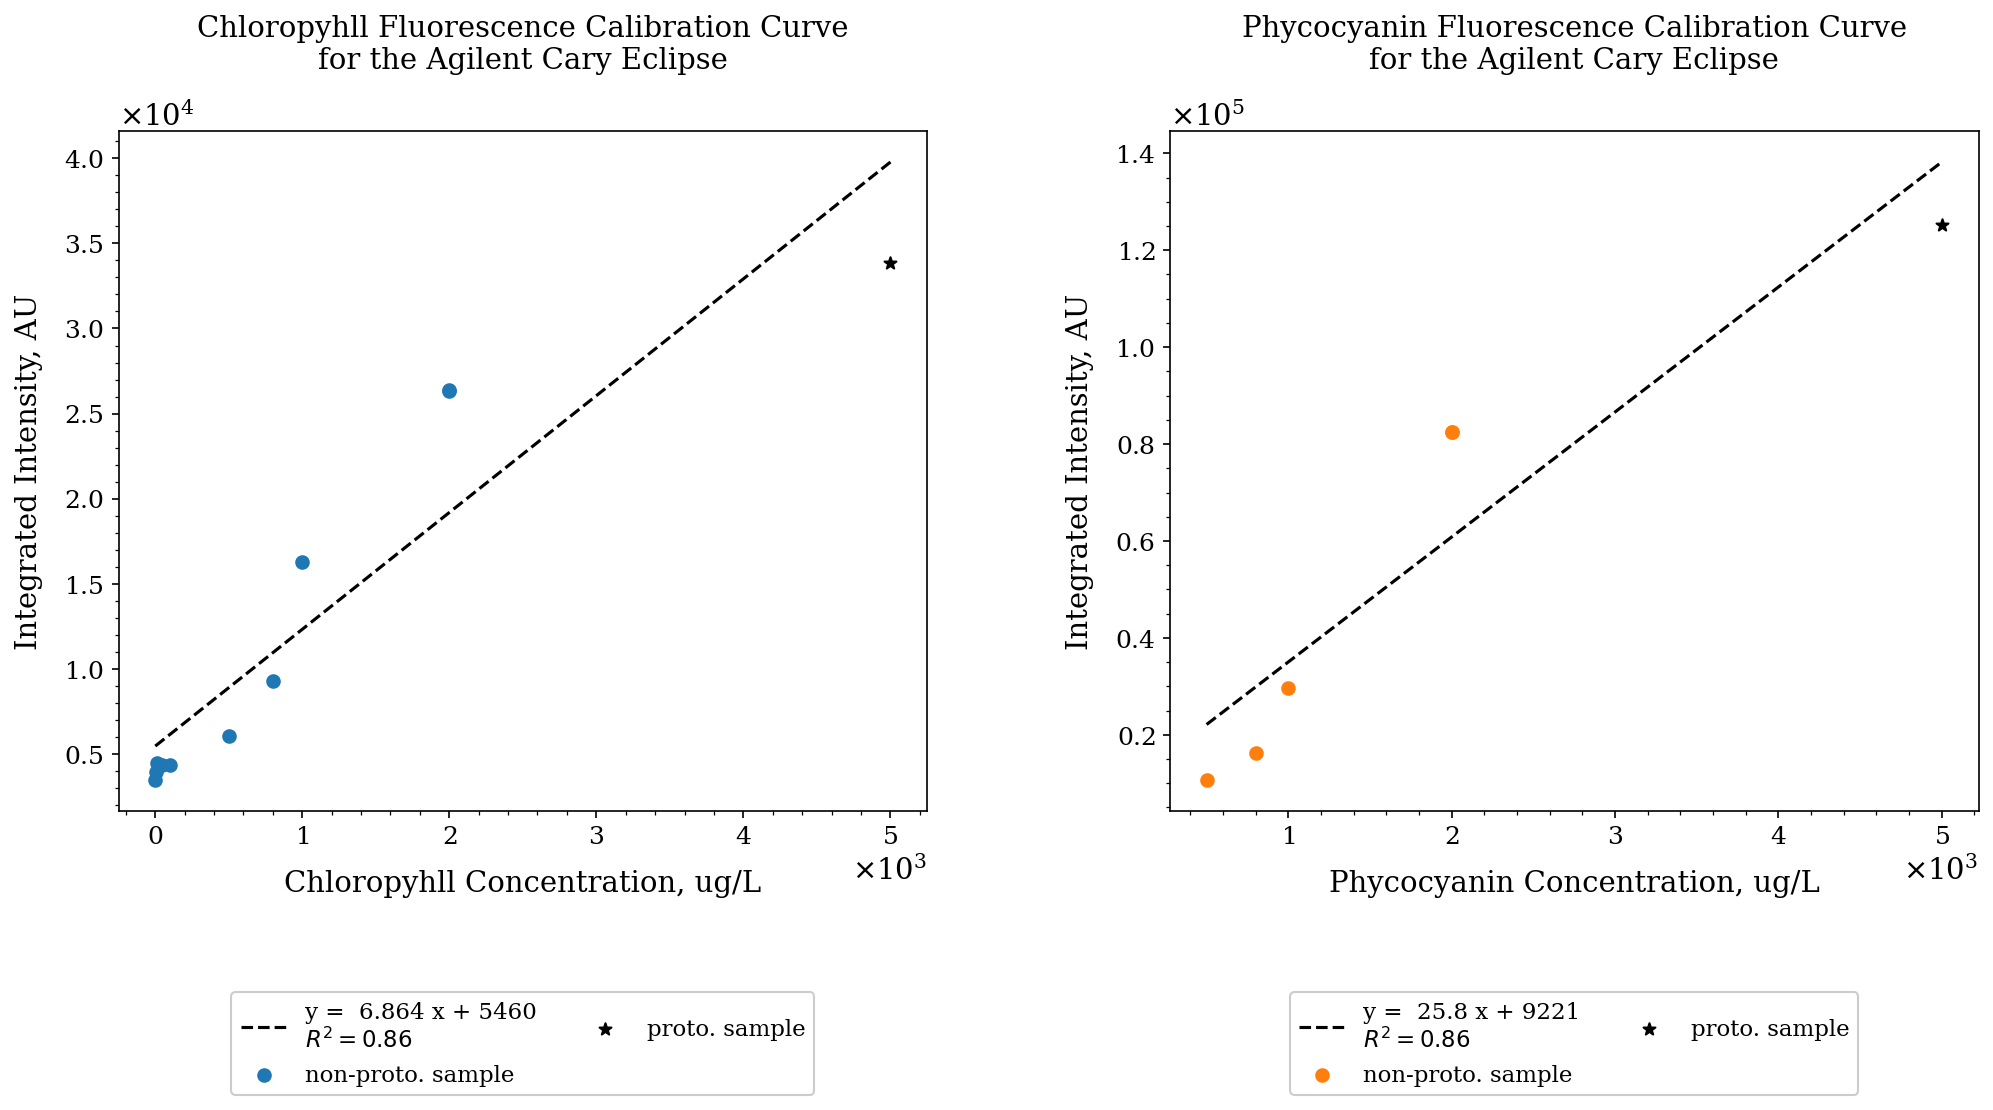

In [20]:
axes = pyeem.plots.calibration_curves_plot(
    dataset, cal_df, fig_kws={"figsize":(16,6), "dpi": 150}
)
"""
axes = pyeem.plots.calibration_curves_plot(
    dataset, cal_df, fig_kws={"dpi": 150}
)
"""
plt.show()

In [21]:
proto_results_df = pyeem.augmentation.create_prototypical_spectra(
    dataset,
    cal_df
)
display(proto_results_df)

proto_conc source_units intensity_units  \
source                                                 
chloropyhll      5000.0         ug/L   Intensity, AU   
phycocyanin      5000.0         ug/L   Intensity, AU   

                                          hdf_path  
source                                              
chloropyhll  augmentation/prototypical/chloropyhll  
phycocyanin  augmentation/prototypical/phycocyanin

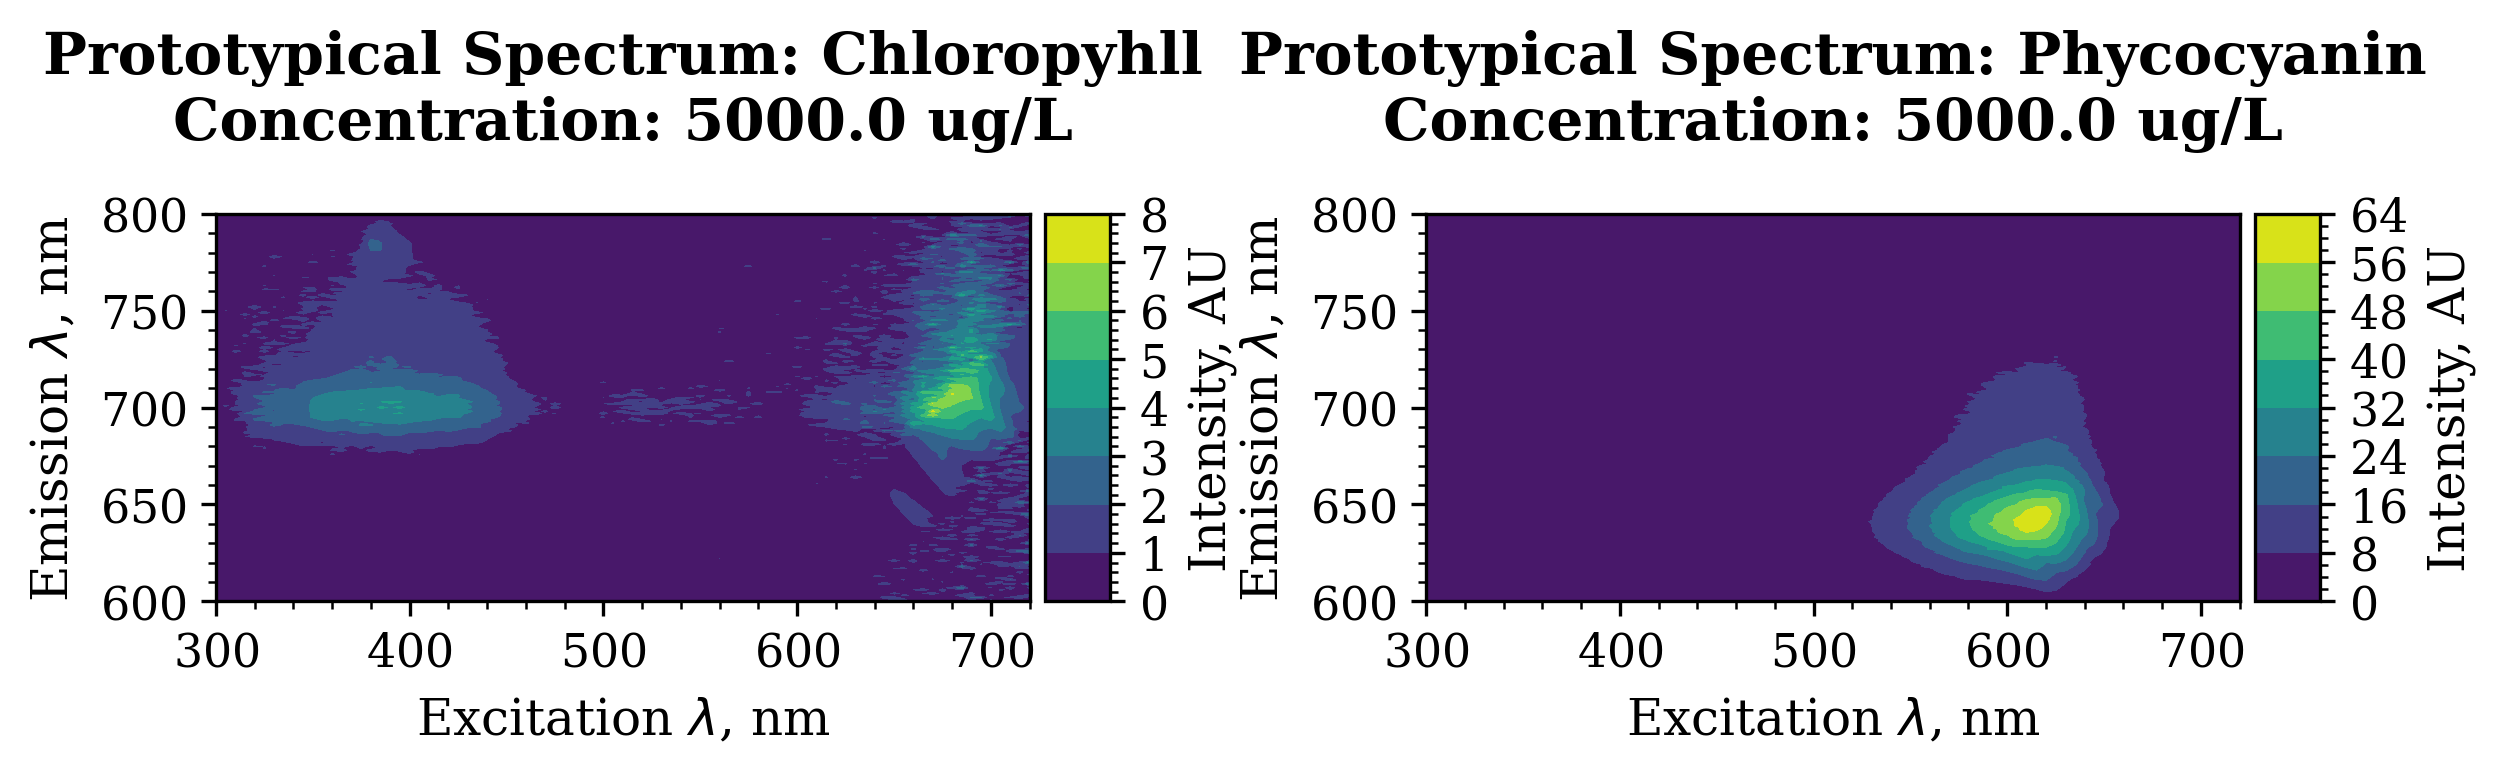

In [24]:
axes = pyeem.plots.prototypical_spectra_plot(
    dataset,
    proto_results_df,
    plot_type="contour",
    fig_kws={"dpi": 300}
)
plt.show()

In [25]:
ss_results_df = pyeem.augmentation.create_single_source_spectra(
    dataset,
    cal_df,
    conc_range=(800, 5000),
    num_spectra=1000
)
display(ss_results_df)

100%|██████████| 2/2 [00:18<00:00,  9.50s/it]


chloropyhll  \
source      source_units intensity_units hdf_path                                               
chloropyhll ug/L         Intensity, AU   augmentation/single_sources/chloropyhll   800.000000   
                                         augmentation/single_sources/chloropyhll   804.204204   
                                         augmentation/single_sources/chloropyhll   808.408408   
                                         augmentation/single_sources/chloropyhll   812.612613   
                                         augmentation/single_sources/chloropyhll   816.816817   
...                                                                                       ...   
phycocyanin ug/L         Intensity, AU   augmentation/single_sources/phycocyanin     0.000000   
                                         augmentation/single_sources/phycocyanin     0.000000   
                                         augmentation/single_sources/phycocyanin     0.000000   
                                         augmentation/single_sources/phycocyanin     0.000000   
                                         augmentation/single_sources/phycocyanin     0.000000   

                                                                                  phycocyanin  
source      source_units intensity_units hdf_path                                              
chloropyhll ug/L         Intensity, AU   augmentation/single_sources/chloropyhll     0.000000  
                                         augmentation/single_sources/chloropyhll     0.000000  
                                         augmentation/single_sources/chloropyhll     0.000000  
                                         augmentation/single_sources/chloropyhll     0.000000  
                                         augmentation/single_sources/chloropyhll     0.000000  
...                                                                                       ...  
phycocyanin ug/L         Intensity, AU   augmentation/single_sources/phycocyanin  4983.183183  
                                         augmentation/single_sources/phycocyanin  4987.387387  
                                         augmentation/single_sources/phycocyanin  4991.591592  
                                         augmentation/single_sources/phycocyanin  4995.795796  
                                         augmentation/single_sources/phycocyanin  5000.000000  

[2000 rows x 2 columns]

In [ ]:
from IPython.display import HTML
%matplotlib inline

source = "phycocyanin"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df.iloc[::500, :],
    source=source,
    plot_type="imshow",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())

In [ ]:
source = "chloropyhll"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df.iloc[::500, :],
    source=source,
    plot_type="imshow",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())

## Augmented Spectra - Mixtures
### Create augmented mixture spectra by scaling and combining the prototypical spectra across a range of concentrations

In [26]:
mix_results_df = pyeem.augmentation.create_mixture_spectra(
    dataset,
    cal_df,
    conc_range=(800, 5000),
    num_steps=15,
    scale="linear"
)
display(mix_results_df)

Creating Augmented Mixtures: 100%|██████████| 225/225 [00:03<00:00, 59.98it/s]


chloropyhll  \
source  source_units intensity_units hdf_path                             
mixture ug/L         Intensity, AU   augmentation/mixtures        800.0   
                                     augmentation/mixtures        800.0   
                                     augmentation/mixtures        800.0   
                                     augmentation/mixtures        800.0   
                                     augmentation/mixtures        800.0   
...                                                                 ...   
                                     augmentation/mixtures       5000.0   
                                     augmentation/mixtures       5000.0   
                                     augmentation/mixtures       5000.0   
                                     augmentation/mixtures       5000.0   
                                     augmentation/mixtures       5000.0   

                                                            phycocyanin  
source  source_units intensity_units hdf_path                            
mixture ug/L         Intensity, AU   augmentation/mixtures        800.0  
                                     augmentation/mixtures       1100.0  
                                     augmentation/mixtures       1400.0  
                                     augmentation/mixtures       1700.0  
                                     augmentation/mixtures       2000.0  
...                                                                 ...  
                                     augmentation/mixtures       3800.0  
                                     augmentation/mixtures       4100.0  
                                     augmentation/mixtures       4400.0  
                                     augmentation/mixtures       4700.0  
                                     augmentation/mixtures       5000.0  

[225 rows x 2 columns]

## Plot the augmented mixture spectra

In [ ]:
anim = pyeem.plots.mixture_animation(
    dataset,
    mix_results_df.iloc[::150, :],
    plot_type="imshow",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())

In [27]:
rutherfordnet = pyeem.analysis.models.RutherfordNet()
rutherfordnet.create_model(input_shape=[201, 85, 1], output_dense_units=2)
rutherfordnet.model.summary()

Model: "rutherfordnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 201, 85, 20)       520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 67, 28, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 67, 28, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 28, 10)        20010     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 9, 10)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 9, 10)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 9, 10)       

In [28]:
(x_train, y_train), (x_test, y_test) = rutherfordnet.prepare_data(
    dataset,
    ss_results_df,
    mix_results_df,
    routine_results_df
)

In [29]:
history = rutherfordnet.train(
    x_train,
    y_train
)

Epoch 1/5
49/49 [==============================] - 21s 419ms/step - loss: 2644748.7500 - accuracy: 0.5806 - val_loss: 831497.1250 - val_accuracy: 0.9656
Epoch 2/5
49/49 [==============================] - 20s 403ms/step - loss: 402207.7188 - accuracy: 0.9794 - val_loss: 143016.2656 - val_accuracy: 0.9925
Epoch 3/5
49/49 [==============================] - 19s 397ms/step - loss: 196067.5000 - accuracy: 0.9884 - val_loss: 126565.1953 - val_accuracy: 0.9910
Epoch 4/5
49/49 [==============================] - 19s 393ms/step - loss: 191032.8906 - accuracy: 0.9865 - val_loss: 221479.1406 - val_accuracy: 0.9895
Epoch 5/5
49/49 [==============================] - 20s 416ms/step - loss: 158661.7500 - accuracy: 0.9846 - val_loss: 81377.2500 - val_accuracy: 0.9970


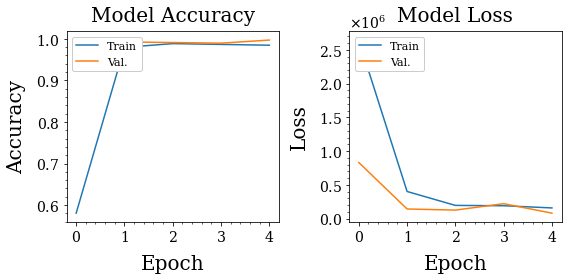

In [30]:
axes = pyeem.plots.model_history_plot(history)
plt.show()

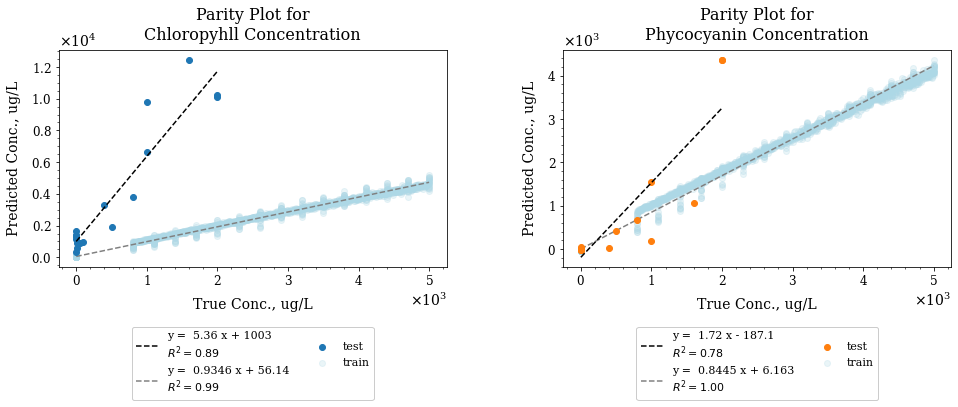

In [31]:
train_predictions = rutherfordnet.model.predict(x_train)
test_predictions = rutherfordnet.model.predict(x_test)

train_pred_results_df = rutherfordnet.get_prediction_results(
    dataset,
    train_predictions,
    y_train
)

test_pred_results_df = rutherfordnet.get_prediction_results(
    dataset,
    test_predictions,
    y_test
)

axes = pyeem.plots.prediction_parity_plot(
    dataset,
    test_pred_results_df,
    train_df=train_pred_results_df
)
plt.show()

In [ ]:
data_dir = "../../../../local_test_data/early_test_tecan/tecan_raw"

In [ ]:
metadata_fp = os.path.join(data_dir, "metadata.csv")
meta_df = pd.read_csv(metadata_fp)

In [ ]:
import numpy as np

for name, group in meta_df.groupby("filename"):
    fp = os.path.join(data_dir, name)
    # Read in raw Tecan Spark data with index column equal to zero
    # and skipping the last row of data which contains End Time
    df = pd.read_excel(fp, index_col=0, skipfooter=1)
    # Drop columns and rows with all NaN values, these sometimes
    # appear at the end for some reason
    df.dropna(how="all", axis=1, inplace=True)
    df.dropna(how="all", axis=0, inplace=True)
    group["next_well"] = group['well_id'].shift(-1)

    for index, row in group.iterrows():
        display(row)
        tmp_df = df.loc[row["well_id"]:]
        if not pd.isna(row["next_well"]):
            tmp_df = df.loc[row["well_id"] : row["next_well"]].iloc[:-1]

        new_header = tmp_df.iloc[0] #grab the first row for the header
        tmp_df = tmp_df[1:] #take the data less the header row
        tmp_df.columns = new_header #set the header row as the df header
        tmp_df.index.name = None
        tmp_df.columns.name = None
        display(tmp_df.head())
